# **Data Insider**

## **1. Configuración del ambiente**

Para empezar, puedes utilizar un entorno virtual como Google Colaboratory, o si deseas, puedes usar el editor Python de tu preferencia, sólo asegúrate de tener Python 3.x instalado en tu computadora. También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, Numpy, Matplotlib, etc.

In [1]:
# Importando librerías

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive


In [2]:
pip install bar_chart_race

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.1 MB/s eta 0:00:00


In [3]:
pip install polygon-api-client


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2023.5.7
    Uninstalling certifi-2023.5.7:
      Successfully uninstalled certifi-2023.5.7


In [4]:
from polygon import RESTClient

## **2. Obtención de la data**

Para obtener los datos necesarios para desarrollar el proyecto, vamos a ingresar a los siguientes links. Adicionalmente, accederás a una API REST para obtener valores históricos de los tickers de las empresas que entrarán a tu análisis.

### **2.1 Forbes 2000 desde 2015-2022**

*   Accede a las siguientes URLs para descargar los datasets que estaremos utilizando: https://data.world/aroissues/forbes-global-2000-2008-2019
*   Después de descargar los datasets, crea un directorio en tu cuenta de Drive y haz el upload de todos ellos.
*   Finalmente, carga los datasets al notebook.

In [5]:
data_2015 = pd.read_excel('/content/drive/MyDrive/BOOTCAMP_ALURA/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2015 — unified industry.xlsx')
data_2016 = pd.read_excel('/content/drive/MyDrive/BOOTCAMP_ALURA/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2016 — unified industry.xlsx')
data_2017 = pd.read_excel('/content/drive/MyDrive/BOOTCAMP_ALURA/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2017 — unified industry.xlsx')
data_2018 = pd.read_excel('/content/drive/MyDrive/BOOTCAMP_ALURA/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2018 — unified industry.xlsx')
data_2019 = pd.read_excel('/content/drive/MyDrive/BOOTCAMP_ALURA/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2019 — unified industry.xlsx')
data_2020 = pd.read_excel('/content/drive/MyDrive/BOOTCAMP_ALURA/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2020 — unified industry.xlsx')
data_2021 = pd.read_excel('/content/drive/MyDrive/BOOTCAMP_ALURA/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2021 — unified industry.xlsx')
data_2022 = pd.read_excel('/content/drive/MyDrive/BOOTCAMP_ALURA/aroissues-forbes-global-2000-2008-2019/Forbes Global 2000 - 2022 — unified industry.xlsx')

In [6]:
data_2015.head()

Rank_nr                     Company                Industry        Country  \
0        1                        ICBC                 Banking          China   
1        2     China Construction Bank                 Banking          China   
2        3  Agricultural Bank of China                 Banking          China   
3        4               Bank of China                 Banking          China   
4        5          Berkshire Hathaway  Diversified Financials  United States   

      Sales  Profits     Assets  Market_Value  
0  166796.0  44757.2  3322043.0        278327  
1  130473.0  37038.9  2698925.0        212945  
2  129221.0  29124.5  2574815.0        189879  
3  120297.0  27526.8  2458336.0        199130  
4  194673.0  19872.0   534618.0        354813

### **2.2 Datos Historicos - API Polygon**

Vas a obtener los datos históricos de las acciones de 5 empresas de una misma industria (Ejemplos de Industrias: Automotriz, Tecnología, Bancos, entre otras):  entre el 1 de enero  y el 31 de diciembre de 2022 y los vas a almacenar en 5 datasets diferentes. (Las variables que necesitas almacenar en el dataset son: El Símbolo, la Fecha, y los Precios de Apertura, Cierre, Máximo y Mínimo de las acciones)

In [7]:
# Variable de mi api_key

api_key = 'SnmgKY7BlwapzSWUg37gPZZDQRh2jBGN'

client = RESTClient(api_key) # api_key is used

In [8]:
aggs = client.get_aggs(
    "AAPL",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

data_apple = pd.DataFrame(aggs)
data_apple['datetime'] = pd.to_datetime(data_apple['timestamp'], unit='ms')
data_apple['symbol'] = 'AAPL'
data_hist_apple= data_apple[['symbol','datetime','open','high','low','close']]
data_hist_apple.to_csv('/content/drive/MyDrive/BOOTCAMP_ALURA/data_hist_apple.csv')

In [9]:
aggs = client.get_aggs(
    "CSCO",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

data_cisco= pd.DataFrame(aggs)
data_cisco['datetime'] = pd.to_datetime(data_cisco['timestamp'], unit='ms')
data_cisco['symbol'] = 'CSCO'
data_hist_cisco= data_cisco[['symbol','datetime','open','high','low','close']]
data_hist_cisco.to_csv('/content/drive/MyDrive/BOOTCAMP_ALURA/data_hist_cisco.csv')



In [10]:
aggs = client.get_aggs(
    "HPQ",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

data_hp= pd.DataFrame(aggs)
data_hp['datetime'] = pd.to_datetime(data_hp['timestamp'], unit='ms')
data_hp['symbol'] = 'HPQ'
data_hist_hp= data_hp[['symbol','datetime','open','high','low','close']]
data_hist_hp.to_csv('/content/drive/MyDrive/BOOTCAMP_ALURA/data_hist_hp.csv')

In [11]:
aggs = client.get_aggs(
    "NOK",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

data_nokia= pd.DataFrame(aggs)
data_nokia['datetime'] = pd.to_datetime(data_nokia['timestamp'], unit='ms')
data_nokia['symbol'] = 'NOK'
data_hist_nokia= data_nokia[['symbol','datetime','open','high','low','close']]
data_hist_nokia.to_csv('/content/drive/MyDrive/BOOTCAMP_ALURA/data_hist_nokia.csv')

In [12]:
aggs = client.get_aggs(
    "LNVGF",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

data_lenovo= pd.DataFrame(aggs)
data_lenovo['datetime'] = pd.to_datetime(data_lenovo['timestamp'], unit='ms')
data_lenovo['symbol'] = 'LNVGF'
data_hist_lenovo= data_lenovo[['symbol','datetime','open','high','low','close']]
data_hist_lenovo.to_csv('/content/drive/MyDrive/BOOTCAMP_ALURA/data_hist_lenovo.csv')

## **3. Data Wrangling**

En general, el objetivo es transformar los datos en bruto en datos limpios, coherentes y listos para ser analizados mediante las técnicas de visualización de datos que estaremos desarrollando.

### **3.1 Forbes 2000 - Renombre de columnas**

In [13]:
# Lista de nombres de columna nuevos
nuevos_nombres = ['Nr_Ranking',"Empresa", "Industria", "Pais",'Ingresos','Ganancias','Activos','Valor de Mercado']

# Lista de DataFrames de Forbes
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

# Iterar sobre los DataFrames de Forbes
for i, df in enumerate(dataframes):
    df.columns = nuevos_nombres
    print(df)

      Nr_Ranking                     Empresa               Industria  \
0              1                        ICBC                 Banking   
1              2     China Construction Bank                 Banking   
2              3  Agricultural Bank of China                 Banking   
3              4               Bank of China                 Banking   
4              5          Berkshire Hathaway  Diversified Financials   
...          ...                         ...                     ...   
1995        1996         Yamanashi Chuo Bank                 Banking   
1996        1998             TransDigm Group     Aerospace & Defense   
1997        1998                         WEG           Capital Goods   
1998        2000                      Hasbro       Consumer Durables   
1999        2000          J. Front Retailing               Retailing   

               Pais  Ingresos  Ganancias    Activos  Valor de Mercado  
0             China  166796.0    44757.2  3322043.0            

### **3.2 Forbes 2000 - Nuevas Variables**

-Margen de Rentabilidad: Ganancias/Ingresos

-Rentabilidad de los Activos (ROA): Ganancias/Activos

-Año: Según el nombre de cada dataset

In [14]:
# Lista de conjuntos de datos cargados
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

for i,df in enumerate(dataframes):
  s=df[df['Ingresos'].isnull()].shape[0]
  p=df[df['Ganancias'].isnull()].shape[0]
  q=df[df['Activos'].isnull()].shape[0]
  r=df[df['Valor de Mercado'].isnull()].shape[0]
  v=i+2015
  print(v,s,p,q,r)

2015 2 0 1 0
2016 3 1 2 2
2017 2 0 1 1
2018 1 0 4 3
2019 0 1 5 0
2020 0 0 0 0
2021 0 0 2 0
2022 0 0 0 0


In [15]:
# Reemplazar los datos nulo de Ingresos, Ganancias, Activos y Valor de Mercado con el promedio de su industria
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

for i,df in enumerate(dataframes):
  promedio_ingresos = df.groupby('Industria')['Ingresos'].mean().round(1)
  df['Ingresos'] = df.apply(lambda row: promedio_ingresos[row['Industria']] if pd.isnull(row['Ingresos']) else row['Ingresos'], axis=1)
  promedio_ganancias = df.groupby('Industria')['Ganancias'].mean().round(1)
  df['Ganancias'] = df.apply(lambda row: promedio_ganancias[row['Industria']] if pd.isnull(row['Ganancias']) else row['Ganancias'], axis=1)
  promedio_activos = df.groupby('Industria')['Activos'].mean().round(1)
  df['Activos'] = df.apply(lambda row: promedio_activos[row['Industria']] if pd.isnull(row['Activos']) else row['Activos'], axis=1)
  promedio_mercado = df.groupby('Industria')['Valor de Mercado'].mean().round(1)
  df['Valor de Mercado'] = df.apply(lambda row: promedio_mercado[row['Industria']] if pd.isnull(row['Valor de Mercado']) else row['Valor de Mercado'], axis=1)
  dataframes[i] = df


In [16]:
# Lista de conjuntos de datos cargados
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

for i,df in enumerate(dataframes):
  s=df[df['Ingresos'].isnull()].shape[0]
  p=df[df['Ganancias'].isnull()].shape[0]
  q=df[df['Activos'].isnull()].shape[0]
  r=df[df['Valor de Mercado'].isnull()].shape[0]
  v=i+2015
  print(v,s,p,q,r)

2015 0 0 0 0
2016 0 0 0 0
2017 0 0 0 0
2018 0 0 0 0
2019 0 0 0 0
2020 0 0 0 0
2021 0 0 0 0
2022 0 0 0 0


In [17]:
# Creamos las nuevas variables
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

contador = 0
# Iterar sobre cada conjunto de datos
for i, df in enumerate(dataframes):
    # Margen_de_rentabilidad
    df['Margen_de_rentabilidad'] = (df['Ganancias'] /df['Ingresos']).round(4)
    # Rentabilidad de los activos
    df['ROA'] = (df['Ganancias']/df['Activos']).round(4)
    # Año
    df['Año']=2015+contador
    contador +=1
    #Guardar el conjunto de datos actualizado en una nueva variable
    dataframes[i] = df


In [18]:
data_2015.head()

Nr_Ranking                     Empresa               Industria  \
0           1                        ICBC                 Banking   
1           2     China Construction Bank                 Banking   
2           3  Agricultural Bank of China                 Banking   
3           4               Bank of China                 Banking   
4           5          Berkshire Hathaway  Diversified Financials   

            Pais  Ingresos  Ganancias    Activos  Valor de Mercado  \
0          China  166796.0    44757.2  3322043.0            278327   
1          China  130473.0    37038.9  2698925.0            212945   
2          China  129221.0    29124.5  2574815.0            189879   
3          China  120297.0    27526.8  2458336.0            199130   
4  United States  194673.0    19872.0   534618.0            354813   

   Margen_de_rentabilidad     ROA   Año  
0                  0.2683  0.0135  2015  
1                  0.2839  0.0137  2015  
2                  0.2254  0.0113  2015  
3                  0.2288  0.0112  2015  
4                  0.1021  0.0372  2015

### **3.3 Fortune Global 500 - Renombre de columnas y Nueva Variable Anio**

In [19]:
# Carga de las bases de Fortune Global
data_fg_pre_2015 = pd.read_html('/content/drive/MyDrive/BOOTCAMP_ALURA/fortune_global/fortune_global_2015.html')
data_fg_2015=data_fg_pre_2015[0]
data_fg_pre_2016 = pd.read_html('/content/drive/MyDrive/BOOTCAMP_ALURA/fortune_global/fortune_global_2016.html')
data_fg_2016=data_fg_pre_2016[0]
data_fg_pre_2017 = pd.read_html('/content/drive/MyDrive/BOOTCAMP_ALURA/fortune_global/fortune_global_2017.html')
data_fg_2017=data_fg_pre_2017[0]
data_fg_pre_2018 = pd.read_html('/content/drive/MyDrive/BOOTCAMP_ALURA/fortune_global/fortune_global_2018.html')
data_fg_2018=data_fg_pre_2018[0]
data_fg_pre_2019 = pd.read_html('/content/drive/MyDrive/BOOTCAMP_ALURA/fortune_global/fortune_global_2019.html')
data_fg_2019=data_fg_pre_2019[0]
data_fg_pre_2020 = pd.read_html('/content/drive/MyDrive/BOOTCAMP_ALURA/fortune_global/fortune_global_2020.html')
data_fg_2020=data_fg_pre_2020[0]
data_fg_pre_2021 = pd.read_html('/content/drive/MyDrive/BOOTCAMP_ALURA/fortune_global/fortune_global_2021.html')
data_fg_2021=data_fg_pre_2021[0]
data_fg_pre_2022 = pd.read_html('/content/drive/MyDrive/BOOTCAMP_ALURA/fortune_global/fortune_global_2022.html')
data_fg_2022=data_fg_pre_2022[0]

In [20]:
# Obtenemos solo dos columnas que deseamos para nuestros fines analiticos
columnas_deseadas = ['RemoveName','RemoveEmployees']
data_fg_2015 = data_fg_2015[columnas_deseadas]
data_fg_2016 = data_fg_2016[columnas_deseadas]
data_fg_2017 = data_fg_2017[columnas_deseadas]
data_fg_2018 = data_fg_2018[columnas_deseadas]
data_fg_2019 = data_fg_2019[columnas_deseadas]
data_fg_2020 = data_fg_2020[columnas_deseadas]
data_fg_2021 = data_fg_2021[columnas_deseadas]
data_fg_2022 = data_fg_2022[columnas_deseadas]

In [21]:
# Renombre de las dos variables
nuevos_nombres = ['Empresa',"Empleados"]

# Lista de DataFrames de Fortune Global
dataframes = [data_fg_2015, data_fg_2016, data_fg_2017, data_fg_2018, data_fg_2019, data_fg_2020, data_fg_2021, data_fg_2022]

# Iterar sobre los DataFrames de Fortune Global
for i, df in enumerate(dataframes):
    df.columns = nuevos_nombres
    print(df)

                      Empresa  Empleados
0                     Walmart    2200000
1               Sinopec Group     897488
2           Royal Dutch Shell      94000
3    China National Petroleum    1636532
4                 Exxon Mobil      83700
..                        ...        ...
495     Capital One Financial      46000
496                AntarChile      24031
497      Rolls-Royce Holdings      54100
498                 Cosmo Oil       6359
499        Wuhan Iron & Steel     103594

[500 rows x 2 columns]
                          Empresa  Empleados
0                         Walmart    2300000
1                      State Grid     927839
2        China National Petroleum    1589508
3                   Sinopec Group     810538
4               Royal Dutch Shell      90000
..                            ...        ...
495  Evergrande Real Estate Group      83372
496                       Staples      58963
497            Standard Chartered      84076
498          Rolls-Royce Holdings 

In [22]:
# Lista de conjuntos de datos cargados
dataframes = [data_fg_2015, data_fg_2016, data_fg_2017, data_fg_2018, data_fg_2019, data_fg_2020, data_fg_2021, data_fg_2022]

contador = 0
# Iterar sobre cada conjunto de datos
for i, df in enumerate(dataframes):
    # Año
    df['Año']=2015+contador
    contador +=1
    #Guardar el conjunto de datos actualizado en una nueva variable
    dataframes[i] = df

<ipython-input-22-ecab51cd8439>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Año']=2015+contador
<ipython-input-22-ecab51cd8439>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Año']=2015+contador
<ipython-input-22-ecab51cd8439>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

### **3.4 Country-code - Renombre de columnas**

In [23]:
# Cargamos los dataset Country y Code
data_country= pd.read_csv('/content/drive/MyDrive/BOOTCAMP_ALURA/country_code.csv')
data_continente = pd.read_csv('/content/drive/MyDrive/BOOTCAMP_ALURA/continente.csv')

In [24]:
data_country=data_country.rename(columns={'Country':'Pais','Code':'Codigo'})
data_continente = data_continente[['Country_Name','Three_Letter_Country_Code','Continent_Name']]
data_continente=data_continente.rename(columns={'Country_Name':'Pais','Three_Letter_Country_Code':'Codigo','Continent_Name':'Continente'})

## **4. Juncion de Tablas y Analisis Exploratorio**

Como obtuviste tus datos de diversas fuentes, y debes analizarlos, será necesario realizar la junción de los diferentes datasets identificando el/los atributos clave para realizar estas operaciones

### **Parte 1**

**Obtencion del Continente para la data de Country**

In [25]:
# Al dataframe Country le agregamos la columna continente
data_country_cont = pd.merge(data_country, data_continente[['Codigo','Continente']], on='Codigo', how = 'left')
data_country_cont.head(5)

Pais Codigo Continente
0     Afghanistan    AFG       Asia
1         Albania    ALB     Europe
2         Algeria    DZA     Africa
3  American Samoa    ASM    Oceania
4         Andorra    AND     Europe

In [26]:
# Validamos que hay 222 registros en la data original
data_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pais    222 non-null    object
 1   Codigo  222 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [27]:
# Cuando agregamos el continente, validamos que hay 229 registros, por lo que hay paises que tienes 2 o mas continentes
# Validamos tambien que hay paises que no tienen continente, en este caso hay 3 paises
data_country_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        229 non-null    object
 1   Codigo      229 non-null    object
 2   Continente  226 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


In [28]:
# Obtenemos la informacion de los continentes nulos, 3 registros
data_country_cont[data_country_cont['Continente'].isnull()]


Pais Codigo Continente
16   Bahamas, The    BHM        NaN
114        Kosovo    KSV        NaN
225     West Bank    WBG        NaN

In [29]:
# Buscar filas que contengan 'Bahamas' o 'Kosovo' en la columna 'Pais' en la data de Continentes
# West Bank no es un pais, por lo que no lo buscamos
busqueda = data_continente.query("Pais.str.contains('Koso') or Pais.str.contains('Baha')")
busqueda

Pais Codigo     Continente
13  Bahamas, Commonwealth of the    BHS  North America

*   Se valida que Bahamas deberia de tener codigo de tres digitos BHS.
*   No se encontro el pais Kosovo, por lo que se mantendra nulo el continente
*   West Bank no es un pais es un banco, por lo que el continente sera nulo








In [30]:
# Buscar Bahamas en la data de Country y se valida que tiene otro codigo
busqueda = data_country[data_country['Pais'].str.contains('Baha')]
busqueda

Pais Codigo
14  Bahamas, The    BHM

In [31]:
# Modificamos en la data original Data Country la fila 14 de Bahamas con el nuevo valor del codigo BHM -> BHS
data_country.at[14, 'Codigo'] = 'BHS'

In [32]:
# Realizamos nuevamente la juncion para obtener el continente para la data de Country
data_country_cont = pd.merge(data_country, data_continente[['Codigo','Continente']], on='Codigo', how = 'left')

In [33]:
# Como validamos anteriormente hay paises que tienen dos o mas continentes, validamos cuales son dichos paises
conteo_paises = data_country_cont['Pais'].value_counts()

# Filtrar el DataFrame original utilizando la condición 'conteo_paises > 1'
df_filtrado = data_country_cont[data_country_cont['Pais'].isin(conteo_paises[conteo_paises > 1].index)]
df_filtrado


Pais Codigo Continente
9       Armenia    ARM     Europe
10      Armenia    ARM       Asia
14   Azerbaijan    AZE     Europe
15   Azerbaijan    AZE       Asia
55       Cyprus    CYP     Europe
56       Cyprus    CYP       Asia
77      Georgia    GEO     Europe
78      Georgia    GEO       Asia
108  Kazakhstan    KAZ     Europe
109  Kazakhstan    KAZ       Asia
169      Russia    RUS     Europe
170      Russia    RUS       Asia
210      Turkey    TUR     Europe
211      Turkey    TUR       Asia

In [34]:
# Eliminamos las filas duplicadas y nos quedamos con un pais y un continente
columnas_duplicadas= ['Pais','Codigo']
data_country_cont = data_country_cont.drop_duplicates(subset=columnas_duplicadas)

In [35]:
# Se valida que tiene la misma cantidad de filas que la data original (data_country)
data_country_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 228
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        222 non-null    object
 1   Codigo      222 non-null    object
 2   Continente  220 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


**Juncion entre forbes 2000-2022 y Data_Country**

In [36]:
data_2022_cont = pd.merge(data_2022, data_country_cont[['Pais','Codigo','Continente']], on='Pais', how = 'left')

In [37]:
# Validamos que tiene la misma cantidad de filas que la data original (data_2022)
# Validamos que hay nulos en el codigo y continente
data_2022_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr_Ranking              2000 non-null   object 
 1   Empresa                 2000 non-null   object 
 2   Industria               2000 non-null   object 
 3   Pais                    2000 non-null   object 
 4   Ingresos                2000 non-null   int64  
 5   Ganancias               2000 non-null   float64
 6   Activos                 2000 non-null   int64  
 7   Valor de Mercado        2000 non-null   int64  
 8   Margen_de_rentabilidad  2000 non-null   float64
 9   ROA                     2000 non-null   float64
 10  Año                     2000 non-null   int64  
 11  Codigo                  1934 non-null   object 
 12  Continente              1934 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 218.8+ KB


**Observamos que paises tienen datos nulos en el Codigo**

In [38]:
# Obtenemos la informacion de los continentes nulos
data_2022_nulos=data_2022_cont[data_2022_cont['Codigo'].isnull()]
data_2022_nulos['Pais'].unique()

array(['South Korea', 21274], dtype=object)

1.   Se valida que el pais South Korea no esta haciendo match con el pais de la data country
2.   Se valida que hay un pais 21274, en este caso no es un pais



*Modificamos el nombre a South Korea*

In [39]:
# Obtenemos como se encuentra en nombre de South Korea en la data_country
data_country_cont.query("Pais.str.contains('Korea')")


Pais Codigo Continente
112  Korea, North    PRK       Asia
113  Korea, South    KOR       Asia

In [40]:
# Modificamos en Data_Country_cont la fila 113 con el nuevo valor del pais Korea,South -> South Korea
data_country_cont.at[113, 'Pais'] = 'South Korea'

In [41]:
# Con la informacion actualizada, nuevamente realizamos la juncion de la data de forbes 2022 y la data country_cont
data_2022_cont = pd.merge(data_2022, data_country_cont[['Pais','Codigo','Continente']], on='Pais', how = 'left')

### **Parte 2**

In [42]:
# Validamos si todos los dataset tienen cantidad de 2000 filas
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

for i, df in enumerate(dataframes):
  s = df.shape[0]
  v = i+2015
  print(v,s)

2015 2000
2016 1999
2017 1999
2018 2000
2019 2000
2020 2000
2021 2000
2022 2000


In [43]:
# Validamos que en el Nr_Ranking hay numeros duplicados
data_2016.head(20)

Nr_Ranking                     Empresa                        Industria  \
0            1                        ICBC                          Banking   
1            2     China Construction Bank                          Banking   
2            3  Agricultural Bank of China                          Banking   
3            4          Berkshire Hathaway           Diversified Financials   
4            5              JPMorgan Chase                          Banking   
5            6               Bank of China                          Banking   
6            7                 Wells Fargo                          Banking   
7            8                       Apple  Technology Hardware & Equipment   
8            9                  ExxonMobil             Oil & Gas Operations   
9           10                Toyota Motor                Consumer Durables   
10          11             Bank of America                          Banking   
11          12                        AT&T      Telecommunications services   
12          13                   Citigroup                          Banking   
13          14               HSBC Holdings                          Banking   
14          15      Verizon Communications      Telecommunications services   
15          15             Wal-Mart Stores                        Retailing   
16          17                  PetroChina             Oil & Gas Operations   
17          18                China Mobile      Telecommunications services   
18          18         Samsung Electronics                   Semiconductors   
19          20     Ping An Insurance Group                        Insurance   

              Pais  Ingresos  Ganancias    Activos  Valor de Mercado  \
0            China  171077.0    44160.3  3420257.0          198042.0   
1            China  146816.0    36393.4  2825983.0          162774.0   
2            China  131888.0    28808.7  2739835.0          152736.0   
3    United States  210821.0    24083.0   561068.0          360145.0   
4    United States   99881.0    23548.0  2423808.0          234247.0   
5            China  122027.0    27209.5  2589605.0          143002.0   
6    United States   91431.0    22686.0  1849182.0          255998.0   
7    United States  233273.0    53731.0   293284.0          585951.0   
8    United States  236810.0    16150.0   336758.0          363270.0   
9            Japan  235832.0    19267.0   406692.0          176960.0   
10   United States   91496.0    15844.0  2185498.0          156021.0   
11   United States  146801.0    13244.0   402672.0          234177.0   
12   United States   85945.0    15771.0  1800967.0          138149.0   
13  United Kingdom   70267.0    13478.6  2409656.0          132956.0   
14   United States  131807.0    17970.0   244587.0          206244.0   
15   United States  482130.0    14694.0   199581.0          215696.0   
16           China  274608.0     5704.3   368685.0          203848.0   
17           China  107758.0    17124.5   219893.0          240997.0   
18     South Korea  177286.0    16517.6   206541.0          161550.0   
19           China   98688.0     8657.9   732277.0           89974.0   

    Margen_de_rentabilidad     ROA   Año  
0                   0.2581  0.0129  2016  
1                   0.2479  0.0129  2016  
2                   0.2184  0.0105  2016  
3                   0.1142  0.0429  2016  
4                   0.2358  0.0097  2016  
5                   0.2230  0.0105  2016  
6                   0.2481  0.0123  2016  
7                   0.2303  0.1832  2016  
8                   0.0682  0.0480  2016  
9                   0.0817  0.0474  2016  
10                  0.1732  0.0072  2016  
11                  0.0902  0.0329  2016  
12                  0.1835  0.0088  2016  
13                  0.1918  0.0056  2016  
14                  0.1363  0.0735  2016  
15                  0.0305  0.0736  2016  
16                  0.0208  0.0155  2016  
17                  0.1589  0.0779  2016  
18            

In [44]:
# Modificaremos el Nr_Ranking de todos los dataset
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

for i, df in enumerate(dataframes):
  rango_actualizado = [i + 1 for i in range(len(df))]
  df['Nr_Ranking']=rango_actualizado
  dataframes[i]=df

In [45]:
# La data_forbes tendra 15998 filas ya que en la data 2016 y 2017 tienen solo 1999 filas
data_forbes = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022])

In [46]:
# Realizamos la juncion de la data completa de forbes con la data de country
data_forbes_total = pd.merge(data_forbes, data_country_cont[['Pais','Codigo','Continente']], on='Pais', how = 'left')

In [47]:
# Validamos que solo hay 2 nulos debido a que es pais es un numero.
data_forbes_total[data_forbes_total['Codigo'].isnull()]

Nr_Ranking                         Empresa               Industria  \
13467        1470  fred/companies/F2K/2021/105837  IT Software & Services   
14733         736  fred/companies/F2K/2022/105837  IT Software & Services   

        Pais  Ingresos  Ganancias  Activos  Valor de Mercado  \
13467   5855   68126.0     1793.0  26718.4             235.0   
14733  21274   28636.0      370.0   1468.0             632.0   

       Margen_de_rentabilidad     ROA   Año Codigo Continente  
13467                  0.0263  0.0671  2021    NaN        NaN  
14733                  0.0129  0.2520  2022    NaN        NaN

### **Parte 3**

In [48]:
# Validamos si todos los dataset tienen cantidad de 500 filas
dataframes = [data_fg_2015,data_fg_2016,data_fg_2017,data_fg_2018,data_fg_2019,data_fg_2020,data_fg_2021,data_fg_2022]

for i, df in enumerate(dataframes):
  s = df.shape[0]
  v = i+2015
  print(v,s)

2015 500
2016 500
2017 500
2018 501
2019 500
2020 500
2021 500
2022 500


In [49]:
# En el anterior script se valida que la data del 2018 tiene una fila más, por lo que veremos si hay duplicados
conteo_empresa = data_fg_2018['Empresa'].value_counts()

# Filtrar el DataFrame original utilizando la condición 'conteo_paises > 1'
df_filtrado = data_fg_2018[data_fg_2018['Empresa'].isin(conteo_empresa[conteo_empresa > 1].index)]
df_filtrado

Empresa  Empleados   Año
235    KDDI      38826  2018
236    KDDI      38826  2018

In [50]:
# Eliminamos los duplicados
data_fg_2018=data_fg_2018.drop_duplicates()

In [51]:
# Revalidamos si todos los dataset tienen cantidad de 500 filas
dataframes = [data_fg_2015,data_fg_2016,data_fg_2017,data_fg_2018,data_fg_2019,data_fg_2020,data_fg_2021,data_fg_2022]

for i, df in enumerate(dataframes):
  s = df.shape[0]
  v = i+2015
  print(v,s)

2015 500
2016 500
2017 500
2018 500
2019 500
2020 500
2021 500
2022 500


In [52]:
# Unimos todas las tablas de la data de fortune global desde 2015 hasta 2022
data_fg_total = pd.concat([data_fg_2015,data_fg_2016,data_fg_2017,data_fg_2018,data_fg_2019,data_fg_2020,data_fg_2021,data_fg_2022])
data_fg_total.shape[0]

4000

In [53]:
# Realizamos la juncion de la data completa de forbes con la data de country
data_total = pd.merge(data_forbes_total, data_fg_total[['Año','Empresa','Empleados']], on=['Año','Empresa'], how = 'left')

In [54]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15998 entries, 0 to 15997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr_Ranking              15998 non-null  int64  
 1   Empresa                 15998 non-null  object 
 2   Industria               15998 non-null  object 
 3   Pais                    15998 non-null  object 
 4   Ingresos                15998 non-null  float64
 5   Ganancias               15998 non-null  float64
 6   Activos                 15998 non-null  float64
 7   Valor de Mercado        15998 non-null  float64
 8   Margen_de_rentabilidad  15998 non-null  float64
 9   ROA                     15998 non-null  float64
 10  Año                     15998 non-null  int64  
 11  Codigo                  15996 non-null  object 
 12  Continente              15996 non-null  object 
 13  Empleados               2205 non-null   float64
dtypes: float64(7), int64(2), object(5)
mem

### **Parte Extra**

In [55]:
data_fg_total.loc[data_fg_total["Empresa"] == "China Mobile Communications", "Empresa"] = "Volkswagen Group"
data_fg_total.loc[data_fg_total["Empresa"] == "Volkswagen", "Empresa"] = "China Mobile"
data_fg_total.loc[data_fg_total["Empresa"] == "Walmart", "Empresa"] = "Wal-Mart Stores"

## **5. Consulta a los datos**

Tras realizar las junciones, tendrás un dataset listo para responder a las preguntas que el equipo de asesores ha preparado.

### **Cuestionario A**

1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?


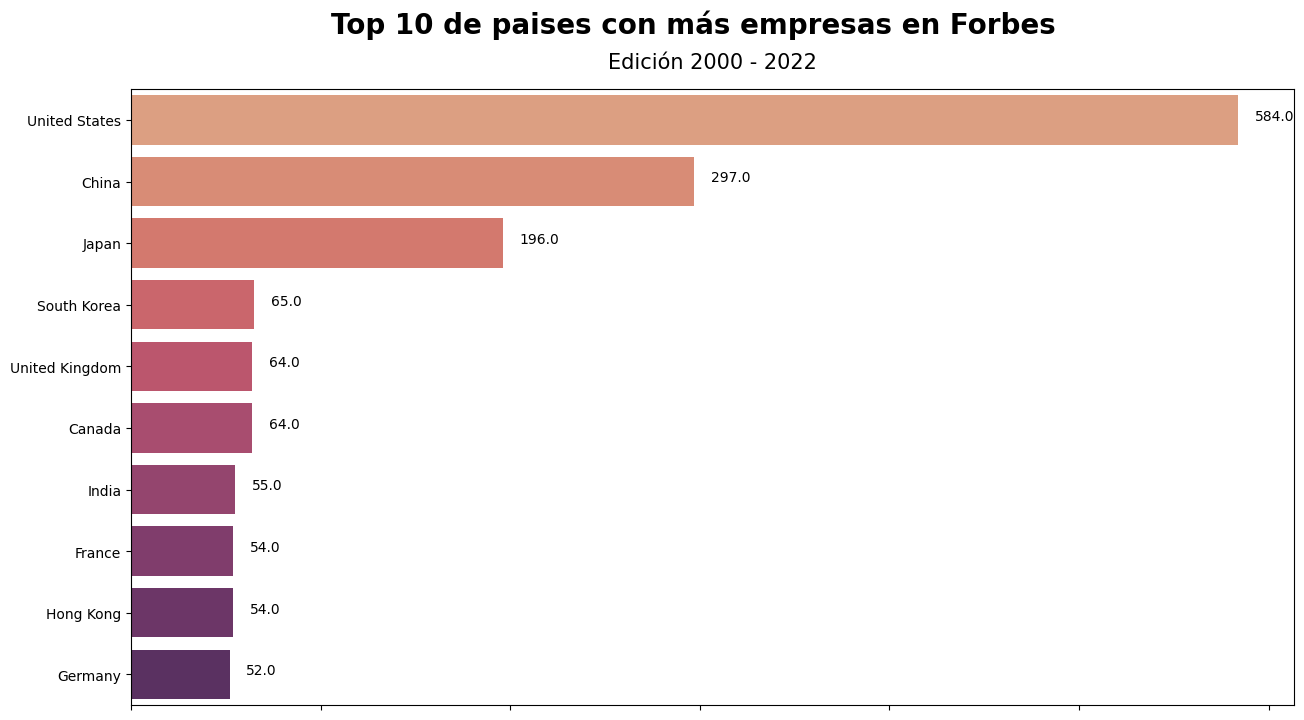

In [56]:
top_10_paises=data_2022_cont['Pais'].value_counts().head(10).index

plt.figure(figsize=(15, 8))
ax=sns.countplot(data=data_2022_cont, y='Pais',
                  order=top_10_paises,palette='flare', saturation=0.75, width=0.8)
ax.set_xticklabels([])
plt.suptitle('Top 10 de paises con más empresas en Forbes',fontsize=20,weight='bold')
plt.title('Edición 2000 - 2022',fontsize=15,pad=15)
plt.ylabel('')
plt.xlabel('')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width + 5
    y = p.get_y() + p.get_height() / 2
    ax.annotate(value, (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()


2. ¿Cuál es el Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones?

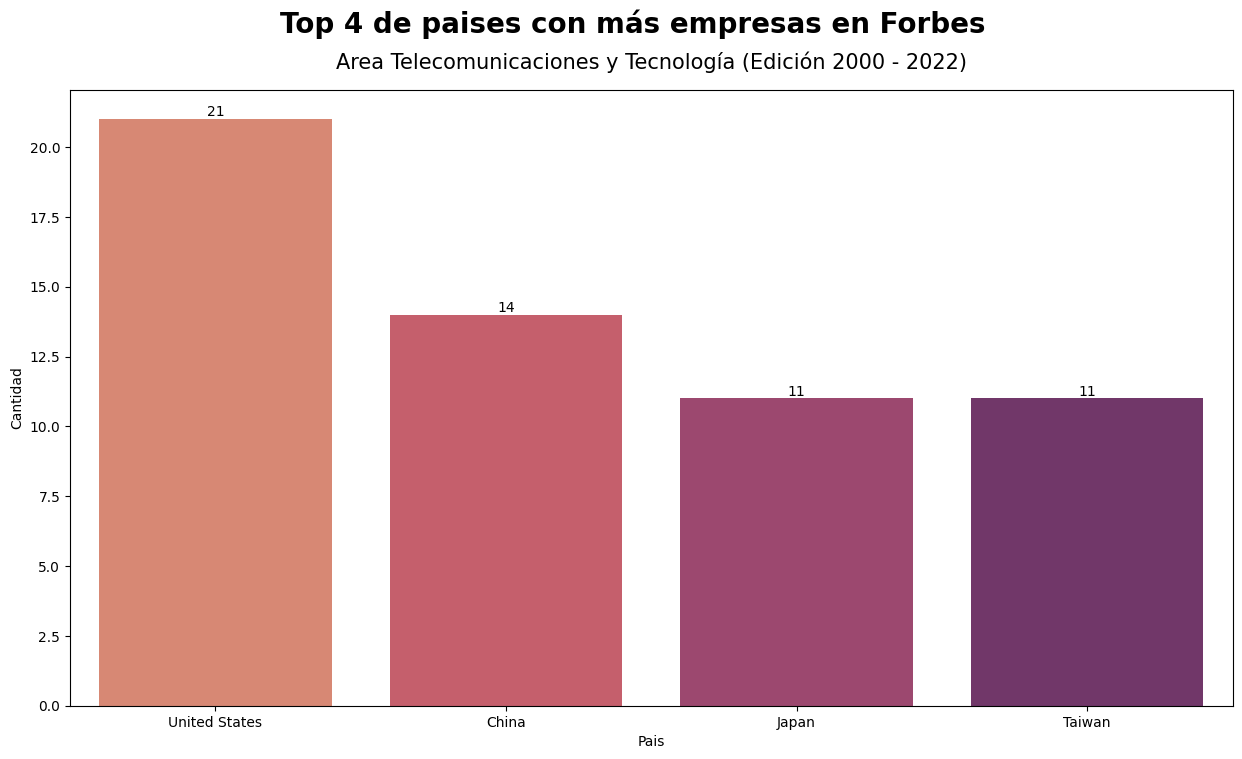

In [57]:
top_4_tel = data_2022_cont[data_2022_cont['Industria'].isin(['Telecommunications Services','Technology Hardware & Equipment'])]['Pais'].value_counts().head(4)

plt.figure(figsize=(15, 8))
ax=sns.barplot(x=top_4_tel.index, y=top_4_tel.values,
                  palette='flare', saturation=0.75, width=0.8)

plt.suptitle('Top 4 de paises con más empresas en Forbes',fontsize=20,weight='bold')
plt.title('Area Telecomunicaciones y Tecnología (Edición 2000 - 2022)',fontsize=15,pad=15)
plt.ylabel('Cantidad')
plt.xlabel('Pais')

for i, v in enumerate(top_4_tel.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

3. ¿Cuál fue el margen de pérdida de las 5 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

<ipython-input-58-f206397341b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel['Margen_de_rentabilidad_abs']=data_hotel['Margen_de_rentabilidad'].abs()


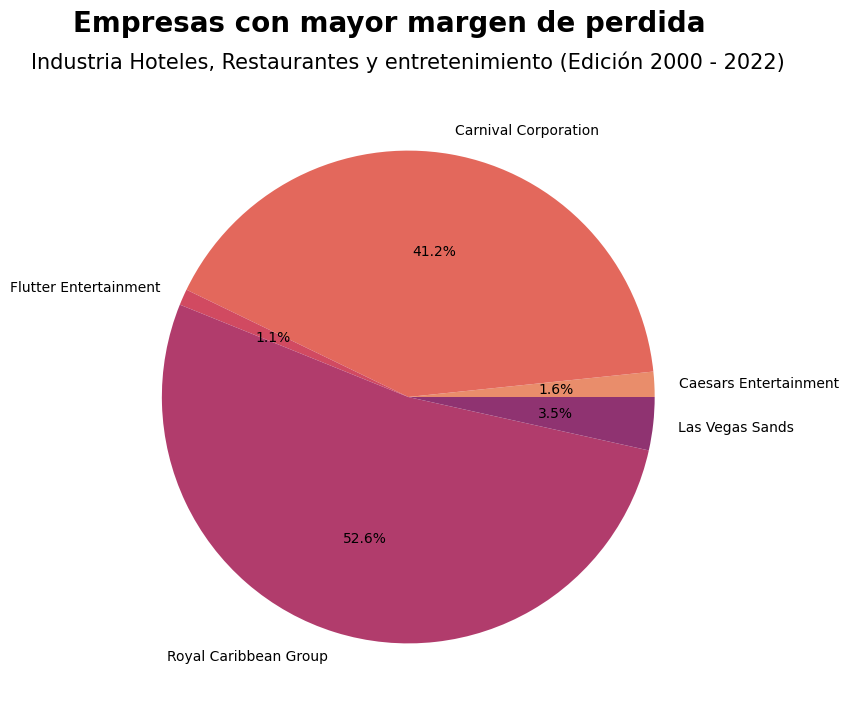

In [58]:
data_hotel=data_2022_cont[(data_2022_cont['Industria']=='Hotels, Restaurants & Leisure')&(data_2022_cont['Ganancias']<0)]
data_hotel['Margen_de_rentabilidad_abs']=data_hotel['Margen_de_rentabilidad'].abs()

plt.figure(figsize=(15, 8))
_, _, autopcts=plt.pie(data_hotel['Margen_de_rentabilidad_abs'], labels=data_hotel['Empresa'] , autopct='%1.1f%%',
        colors=sns.color_palette('flare'))
plt.suptitle('Empresas con mayor margen de perdida',fontsize=20,weight='bold')
plt.title('Industria Hoteles, Restaurantes y entretenimiento (Edición 2000 - 2022)',fontsize=15,pad=15)

plt.show()


4. Considerando a la Industria Petrolera en Asia, ¿Cuál o cuáles empresas superaron en más del 20% su margen de rentabilidad?

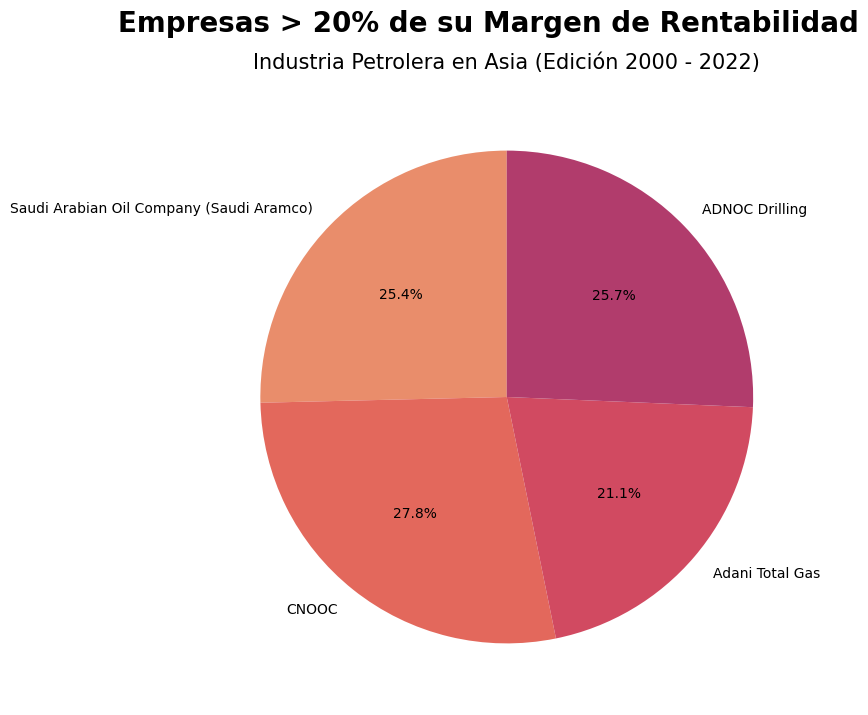

In [59]:
top_oil = data_2022_cont[(data_2022_cont['Industria'] == 'Oil & Gas Operations')&(data_2022_cont['Continente']=='Asia')]
top_oil=top_oil[top_oil['Margen_de_rentabilidad']>0.20]

plt.figure(figsize=(15, 8))
plt.pie(top_oil['Margen_de_rentabilidad'], labels=top_oil['Empresa'] , autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('flare'))
plt.suptitle('Empresas > 20% de su Margen de Rentabilidad',fontsize=20,weight='bold')
plt.title('Industria Petrolera en Asia (Edición 2000 - 2022)',fontsize=15,pad=15)
plt.show()

5. ¿Cuáles fueron las empresas norteamericanas con el mayor porcentaje de rentabilidad por industria?

In [60]:
#Obtenemos las empresas Norteamiericanas y nos quedamos con las de margen de rentabilidad <100
#ya que hay empresas que tienen 406% o 151900% y eso es poco comun para un margen de rentabilidad
top_americana = data_2022_cont[(data_2022_cont['Continente']=='North America')&(data_2022_cont['Margen_de_rentabilidad']<1)]
mayor_rentabilidad =top_americana.groupby('Industria')['Margen_de_rentabilidad'].idxmax()
empresas_rentabilidad = top_americana.loc[mayor_rentabilidad, ['Industria', 'Empresa', 'Margen_de_rentabilidad']]
empresas_rentabilidad['%_rentabilidad']=(empresas_rentabilidad['Margen_de_rentabilidad']*100)


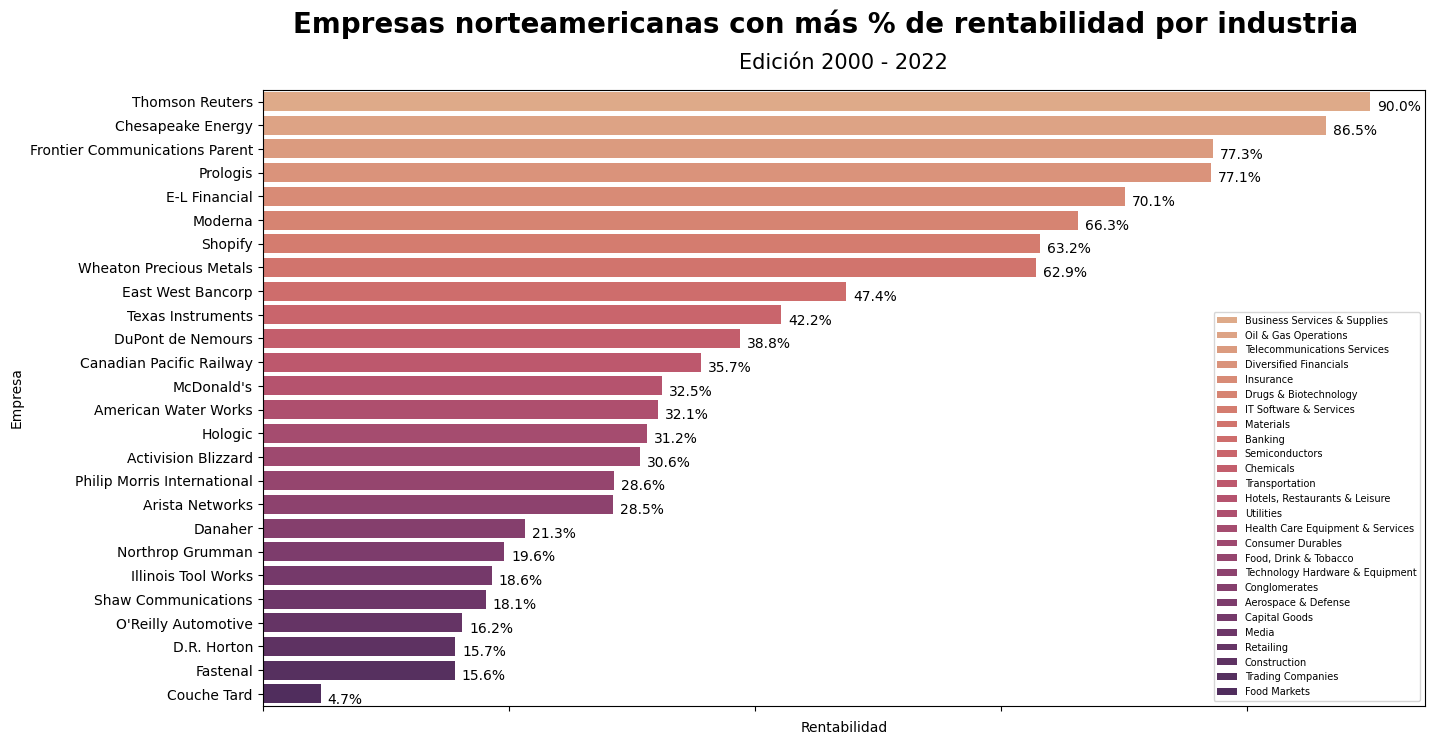

In [61]:
# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
data_sorted = empresas_rentabilidad.sort_values('%_rentabilidad',ascending=False)
ax=sns.barplot(data=data_sorted, x='%_rentabilidad', y='Empresa', hue='Industria', dodge=False,palette='flare')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Empresas norteamericanas con más % de rentabilidad por industria',fontsize=20,weight='bold')
plt.title('Edición 2000 - 2022',fontsize=15,pad=15)
plt.xlabel('Rentabilidad')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()


<ipython-input-127-442aa1a06b90>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



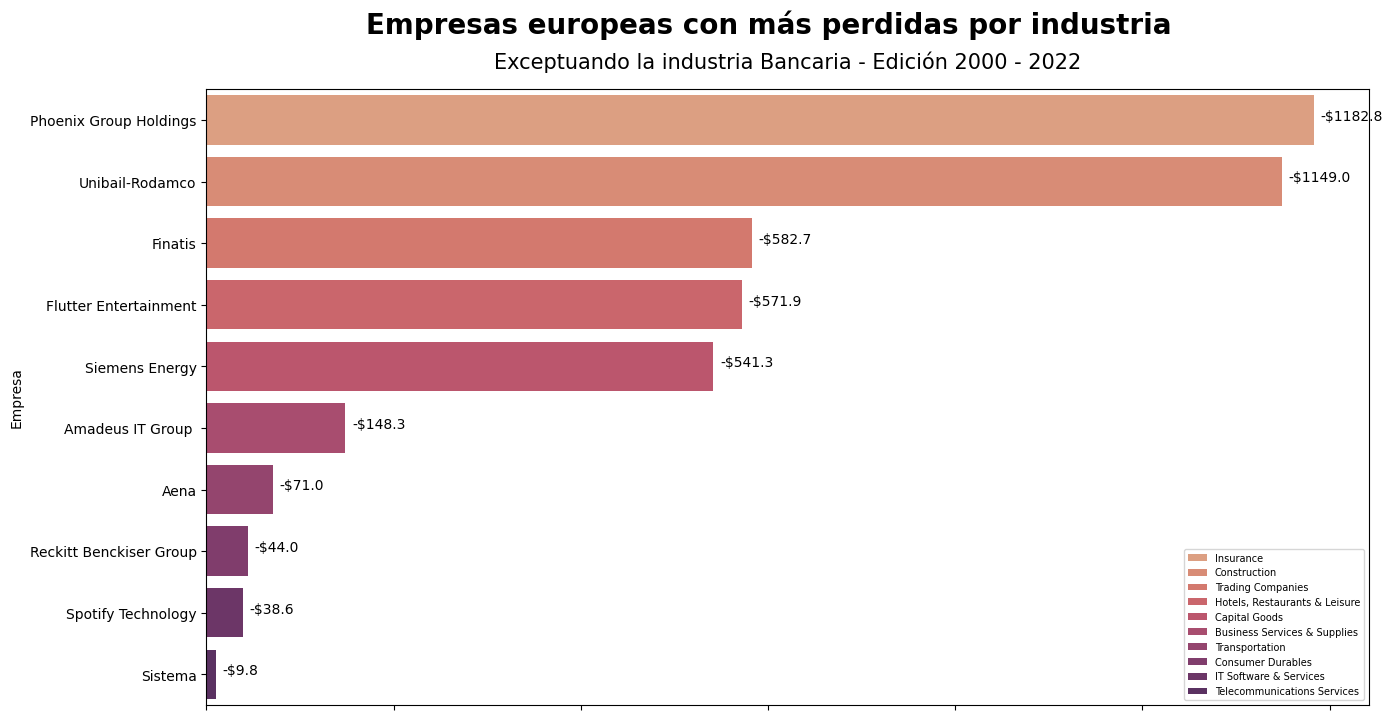

In [127]:
#Quitamos de nuestra base a la industria Banking y nos quedamos con las empresas que se encuentras en Europa y cuyas ganancias son <0
data_sin_bancaria=data_2022_cont[data_2022_cont['Industria']!='Banking']
data_perdidas=data_sin_bancaria[(data_2022_cont['Continente']=='Europe')&(data_2022_cont['Ganancias']<0)]
mayor_perdida =data_perdidas.groupby('Industria')['Ganancias'].idxmax()
empresas_perdida = data_perdidas.loc[mayor_perdida, ['Industria', 'Empresa', 'Ganancias']].sort_values('Ganancias')
empresas_perdida['Ganancias_abs']=empresas_perdida['Ganancias'].abs()

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=empresas_perdida, x='Ganancias_abs', y='Empresa', hue='Industria', dodge=False,palette='flare')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Empresas europeas con más perdidas por industria',fontsize=20,weight='bold')
plt.title('Exceptuando la industria Bancaria - Edición 2000 - 2022',fontsize=15,pad=15)
plt.xlabel('')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()/2
    ax.annotate(f'-${value:.1f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()


6. Excluyendo a la industria Bancaria, ¿Cuáles fueron las empresas europeas con  mayores pérdidas registradas por industria a nivel global?

7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 30000 millones de dólares?

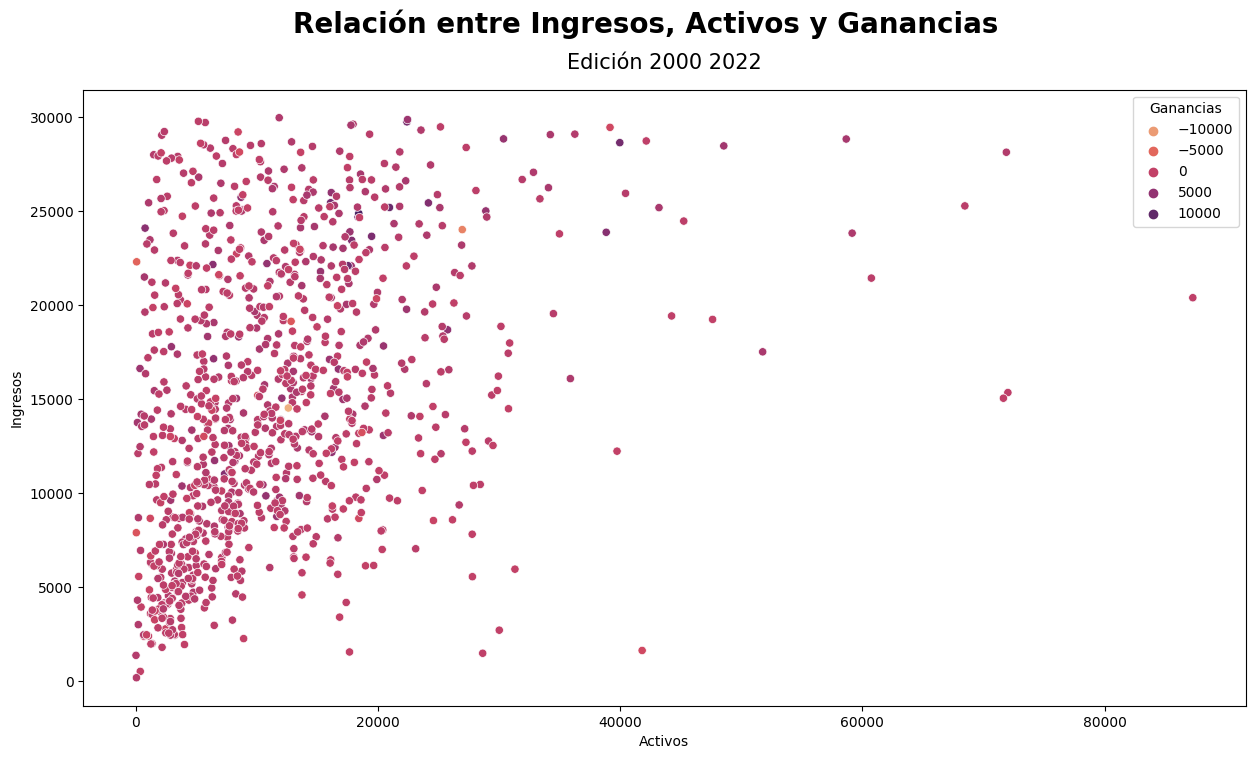

In [63]:
plt.figure(figsize=(15, 8))
# Filtrar los datos
data_filtrada = data_2022_cont[data_2022_cont['Activos'] <= 30000]
distribucion_ingreso = data_filtrada['Ingresos'].describe()
distribucion_activo = data_filtrada['Activos'].describe()
sns.scatterplot(data=data_filtrada, x='Ingresos', y='Activos', hue='Ganancias',palette='flare')

# Personalizar el gráfico
plt.suptitle('Relación entre Ingresos, Activos y Ganancias',fontsize=20,weight='bold')
plt.title('Edición 2000 2022',fontsize=15,pad=15)
plt.xlabel('Activos')
plt.ylabel('Ingresos')

plt.show()



8. Considerando el histórico de valores de las acciones en el año 2022 de las 5 empresas de tu elección (Paso 2), Indica ¿Cuál fue la mejor semana para comprar y cuál para vender respectivamente? (Se compra cuando el precio es bajo, y se vende cuando el precio es alto)

<ipython-input-65-82ceb8abd96a>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semanal = data_hist_cisco.groupby(data_hist_cisco['datetime'].dt.week)['close'].agg(['min', 'max'])
<ipython-input-65-82ceb8abd96a>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semanal['fechas'] = data_hist_cisco.groupby(data_hist_cisco['datetime'].dt.week)['datetime'].agg(lambda x: f"{x.min().date()} - {x.max().date()}")
<ipython-input-65-82ceb8abd96a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_semanal['fechas'], rotation=45, ha='right')


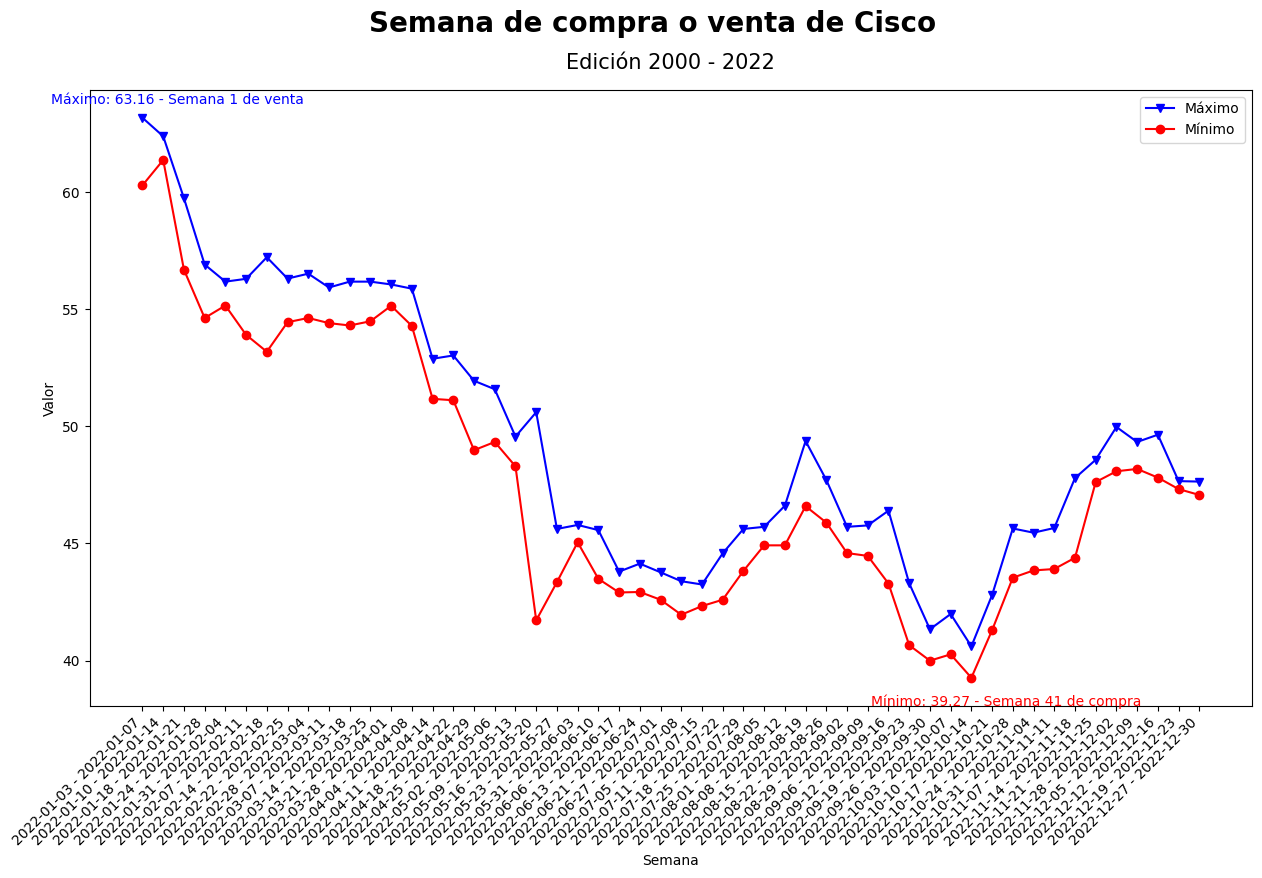

In [65]:
#Agrupamps los datos por semana y calculamos el precio mínimo y máximo para cada semana
data_semanal = data_hist_cisco.groupby(data_hist_cisco['datetime'].dt.week)['close'].agg(['min', 'max'])
data_semanal['fechas'] = data_hist_cisco.groupby(data_hist_cisco['datetime'].dt.week)['datetime'].agg(lambda x: f"{x.min().date()} - {x.max().date()}")
# Encontrar la semana con el precio mínimo y máximo
semana_compra = data_semanal['min'].idxmin()
semana_venta = data_semanal['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semanal['fechas'], data_semanal['max'], marker='v', label='Máximo',color='blue')
ax.plot(data_semanal['fechas'], data_semanal['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de Cisco', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semanal['fechas'], rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semanal['max'].idxmax()
indice_minimo = data_semanal['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semanal.loc[indice_maximo, 'max']
valor_minimo = data_semanal.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='blue', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()



<ipython-input-66-273d54c782d5>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semanal = data_hist_apple.groupby(data_hist_apple['datetime'].dt.week)['close'].agg(['min', 'max'])
<ipython-input-66-273d54c782d5>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semanal['fechas'] = data_hist_apple.groupby(data_hist_apple['datetime'].dt.week)['datetime'].agg(lambda x: f"{x.min().date()} - {x.max().date()}")
<ipython-input-66-273d54c782d5>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_semanal['fechas'], rotation=45, ha='right')


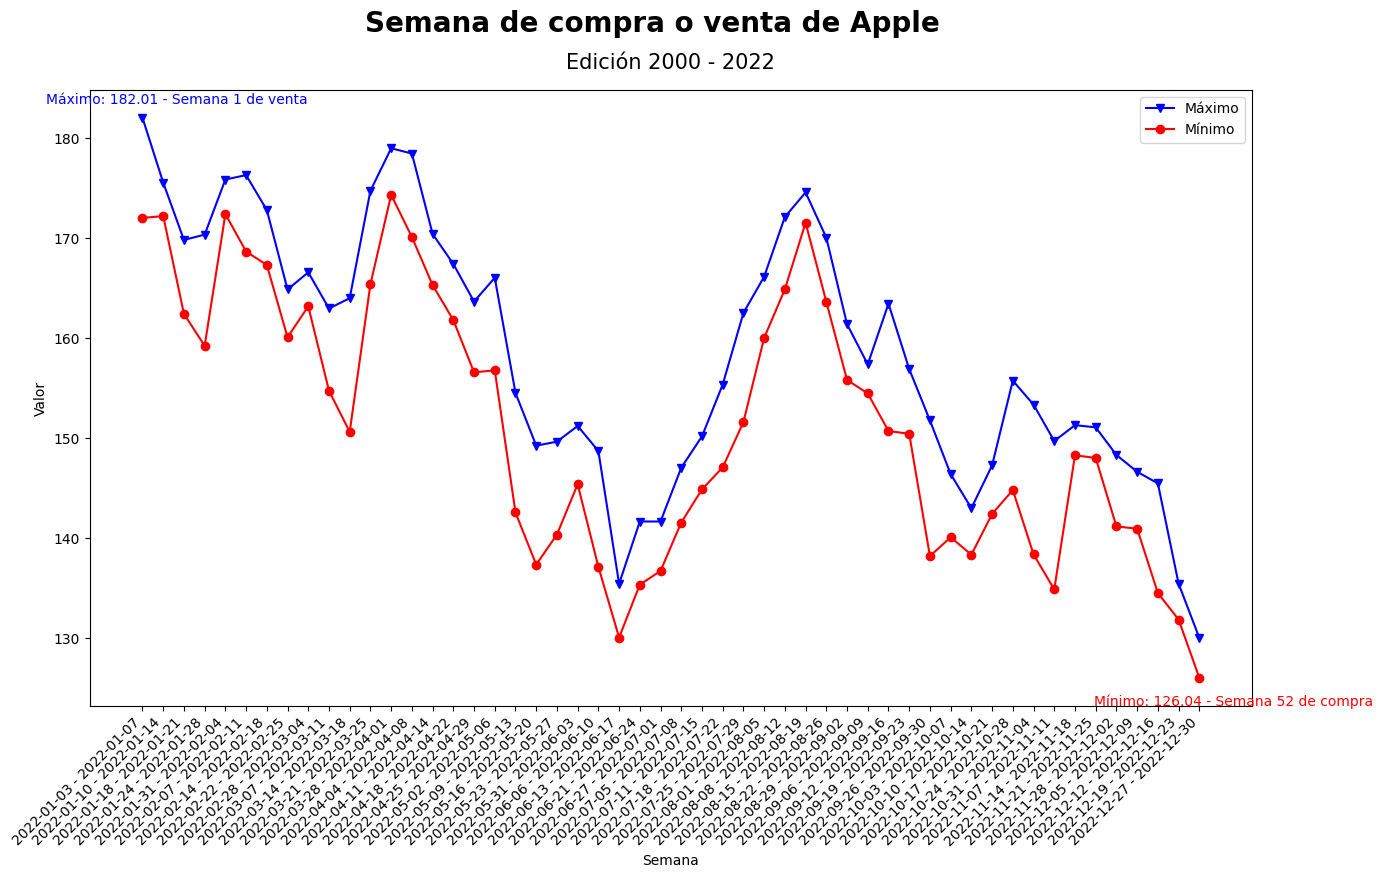

In [66]:
#Agrupamps los datos por semana y calculamos el precio mínimo y máximo para cada semana
data_semanal = data_hist_apple.groupby(data_hist_apple['datetime'].dt.week)['close'].agg(['min', 'max'])
data_semanal['fechas'] = data_hist_apple.groupby(data_hist_apple['datetime'].dt.week)['datetime'].agg(lambda x: f"{x.min().date()} - {x.max().date()}")
# Encontrar la semana con el precio mínimo y máximo
semana_compra = data_semanal['min'].idxmin()
semana_venta = data_semanal['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semanal['fechas'], data_semanal['max'], marker='v', label='Máximo',color='blue')
ax.plot(data_semanal['fechas'], data_semanal['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de Apple', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semanal['fechas'], rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semanal['max'].idxmax()
indice_minimo = data_semanal['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semanal.loc[indice_maximo, 'max']
valor_minimo = data_semanal.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='blue', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()


<ipython-input-128-38d10ef7ee78>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-128-38d10ef7ee78>:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-128-38d10ef7ee78>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



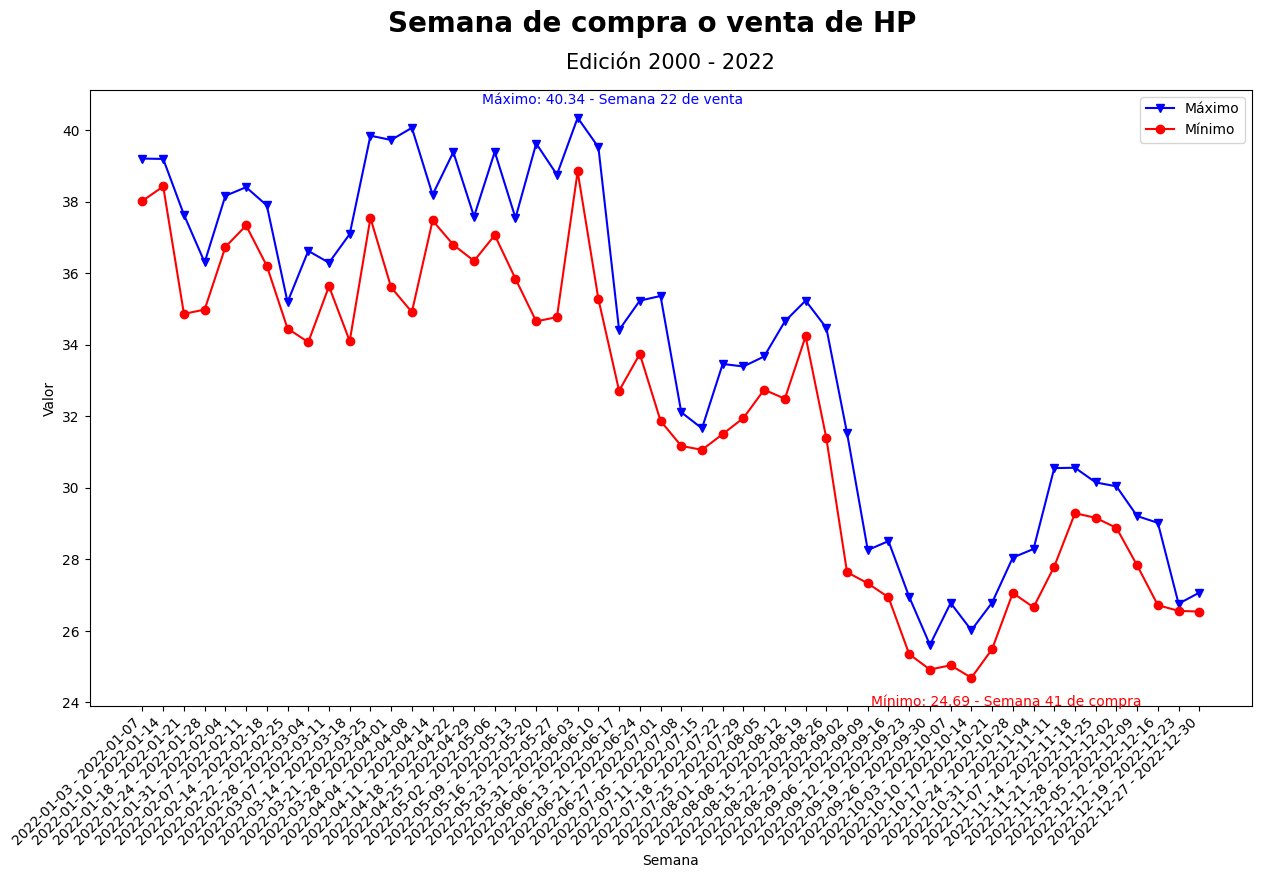

In [128]:
#Agrupamps los datos por semana y calculamos el precio mínimo y máximo para cada semana
data_semanal = data_hist_hp.groupby(data_hist_hp['datetime'].dt.week)['close'].agg(['min', 'max'])
data_semanal['fechas'] = data_hist_hp.groupby(data_hist_hp['datetime'].dt.week)['datetime'].agg(lambda x: f"{x.min().date()} - {x.max().date()}")
# Encontrar la semana con el precio mínimo y máximo
semana_compra = data_semanal['min'].idxmin()
semana_venta = data_semanal['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semanal['fechas'], data_semanal['max'], marker='v', label='Máximo',color='blue')
ax.plot(data_semanal['fechas'], data_semanal['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de HP', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semanal['fechas'], rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semanal['max'].idxmax()
indice_minimo = data_semanal['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semanal.loc[indice_maximo, 'max']
valor_minimo = data_semanal.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='blue', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()

<ipython-input-129-8b516fd686e9>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-129-8b516fd686e9>:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-129-8b516fd686e9>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



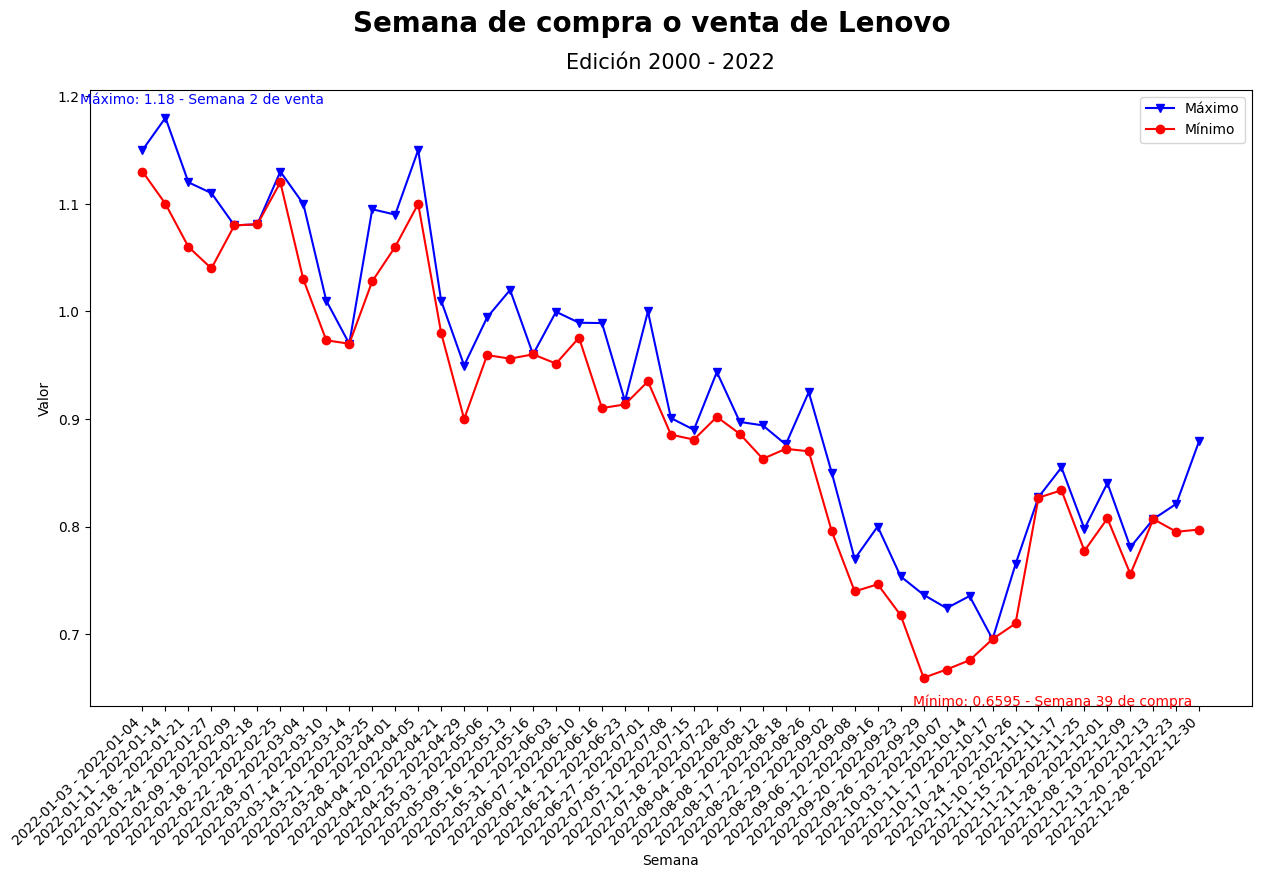

In [129]:
#Agrupamps los datos por semana y calculamos el precio mínimo y máximo para cada semana
data_semanal = data_hist_lenovo.groupby(data_hist_lenovo['datetime'].dt.week)['close'].agg(['min', 'max'])
data_semanal['fechas'] = data_hist_lenovo.groupby(data_hist_lenovo['datetime'].dt.week)['datetime'].agg(lambda x: f"{x.min().date()} - {x.max().date()}")
# Encontrar la semana con el precio mínimo y máximo
semana_compra = data_semanal['min'].idxmin()
semana_venta = data_semanal['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semanal['fechas'], data_semanal['max'], marker='v', label='Máximo',color='blue')
ax.plot(data_semanal['fechas'], data_semanal['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de Lenovo', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semanal['fechas'], rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semanal['max'].idxmax()
indice_minimo = data_semanal['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semanal.loc[indice_maximo, 'max']
valor_minimo = data_semanal.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='blue', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()

<ipython-input-130-56de39bd8ca6>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-130-56de39bd8ca6>:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-130-56de39bd8ca6>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



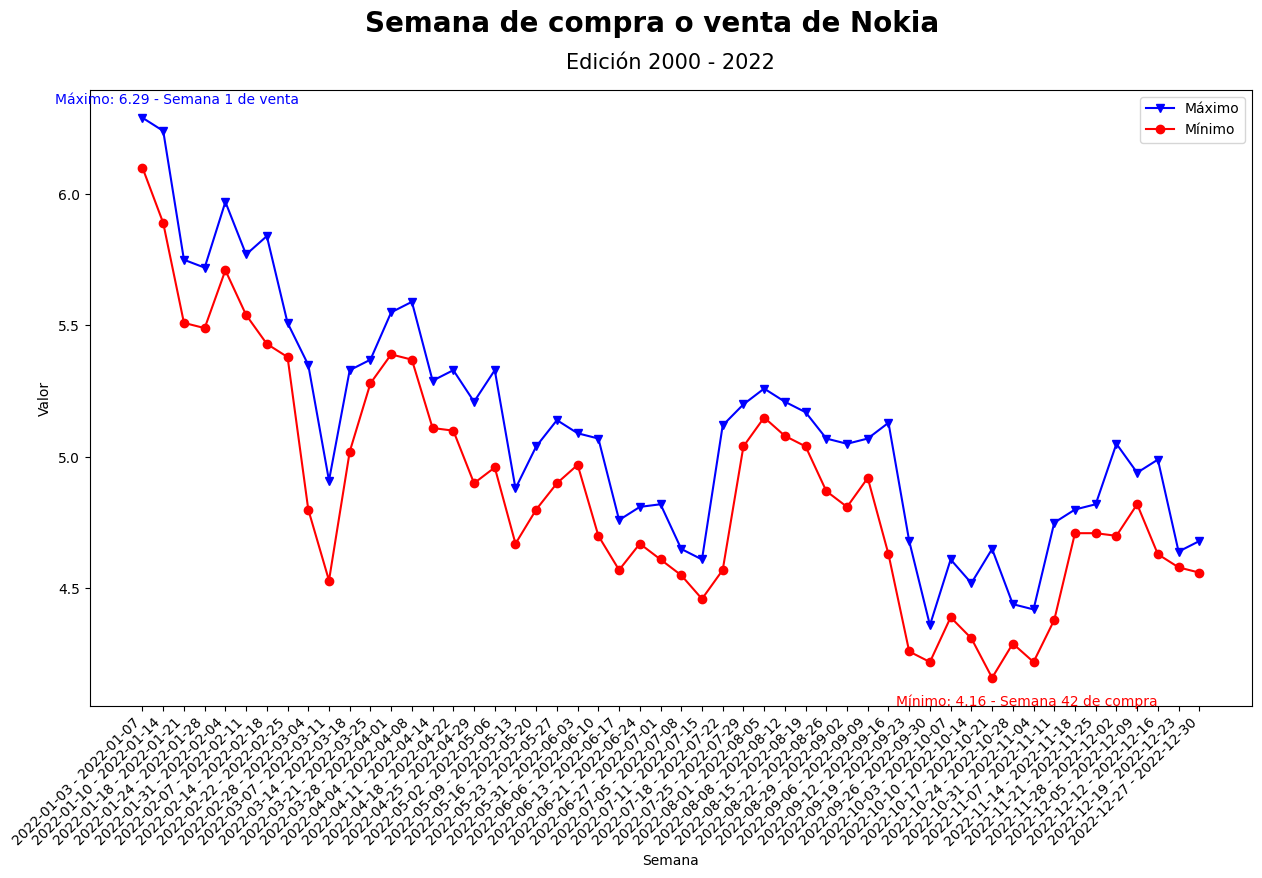

In [130]:
#Agrupamps los datos por semana y calculamos el precio mínimo y máximo para cada semana
data_semanal = data_hist_nokia.groupby(data_hist_nokia['datetime'].dt.week)['close'].agg(['min', 'max'])
data_semanal['fechas'] = data_hist_nokia.groupby(data_hist_nokia['datetime'].dt.week)['datetime'].agg(lambda x: f"{x.min().date()} - {x.max().date()}")
# Encontrar la semana con el precio mínimo y máximo
semana_compra = data_semanal['min'].idxmin()
semana_venta = data_semanal['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semanal['fechas'], data_semanal['max'], marker='v', label='Máximo',color='blue')
ax.plot(data_semanal['fechas'], data_semanal['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de Nokia', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semanal['fechas'], rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semanal['max'].idxmax()
indice_minimo = data_semanal['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semanal.loc[indice_maximo, 'max']
valor_minimo = data_semanal.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='blue', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()

### **Cuestionario B**

Las siguientes preguntas se refieren al ranking Forbes 2000 considerando el periodo 2015 - 2022:

1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?

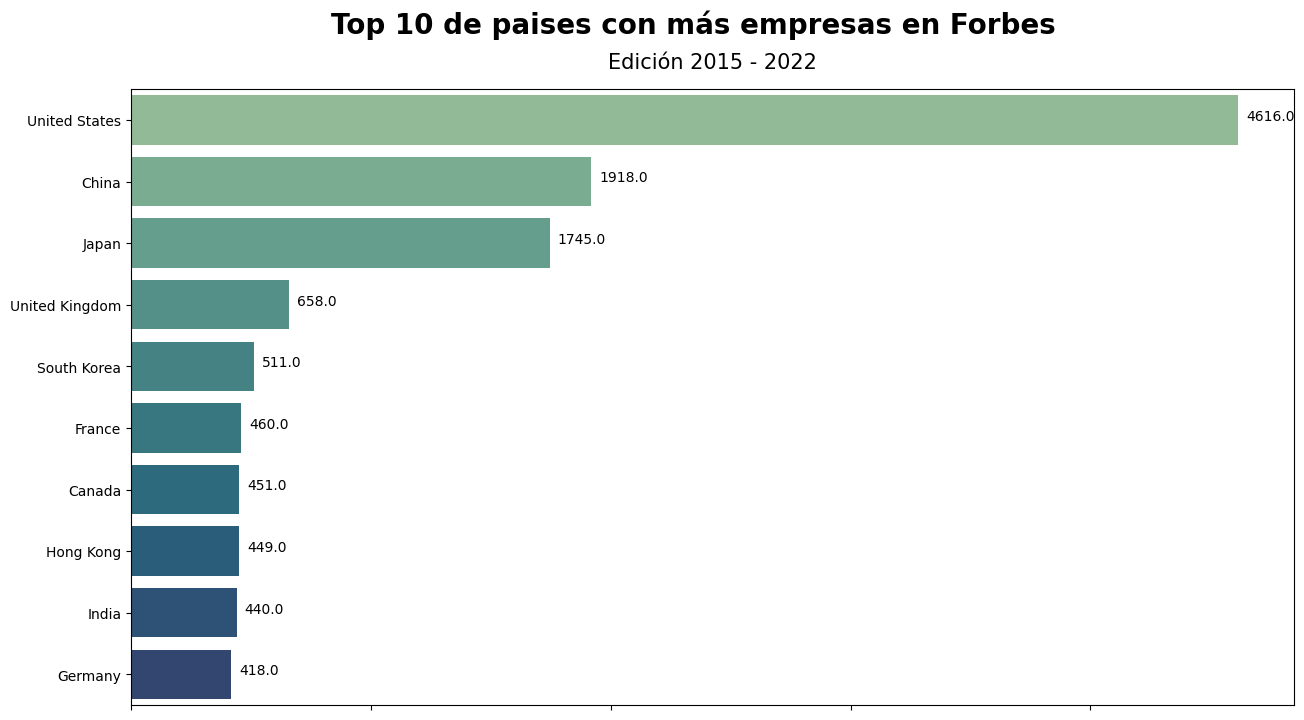

In [70]:
top_10_paises=data_forbes_total['Pais'].value_counts().head(10).index

plt.figure(figsize=(15, 8))
ax=sns.countplot(data=data_forbes_total, y='Pais',
                  order=top_10_paises,palette='crest', saturation=0.75, width=0.8)
ax.set_xticklabels([])
plt.suptitle('Top 10 de paises con más empresas en Forbes',fontsize=20,weight='bold')
plt.title('Edición 2015 - 2022',fontsize=15,pad=15)
plt.ylabel('')
plt.xlabel('')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width + 5
    y = p.get_y() + p.get_height() / 2
    ax.annotate(value, (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()

2. ¿Cuál es el Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones?

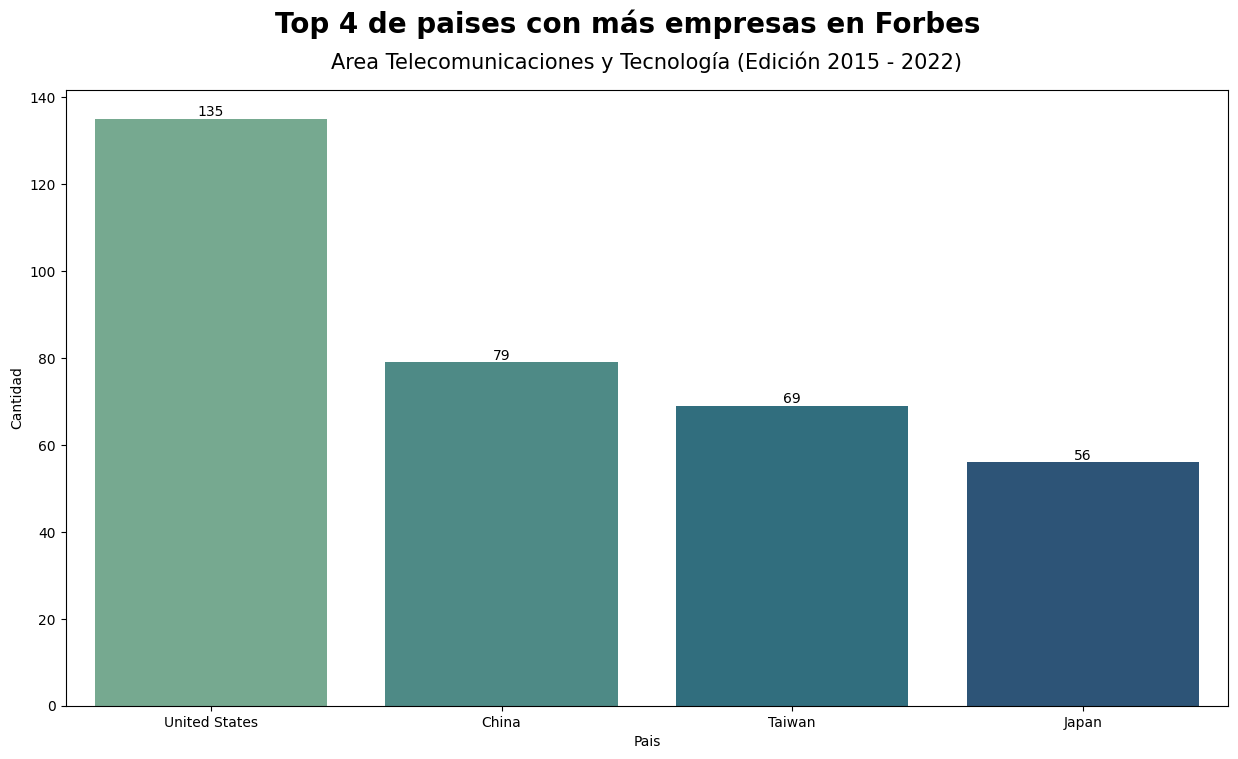

In [71]:
top_4_tel = data_forbes_total[data_forbes_total['Industria'].isin(['Telecommunications Services','Technology Hardware & Equipment'])]['Pais'].value_counts().head(4)

plt.figure(figsize=(15, 8))
ax=sns.barplot(x=top_4_tel.index, y=top_4_tel.values,
                  palette='crest', saturation=0.75, width=0.8)

plt.suptitle('Top 4 de paises con más empresas en Forbes',fontsize=20,weight='bold')
plt.title('Area Telecomunicaciones y Tecnología (Edición 2015 - 2022)',fontsize=15,pad=15)
plt.ylabel('Cantidad')
plt.xlabel('Pais')

for i, v in enumerate(top_4_tel.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

3. ¿Cuál fue el margen de pérdida de las 10 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

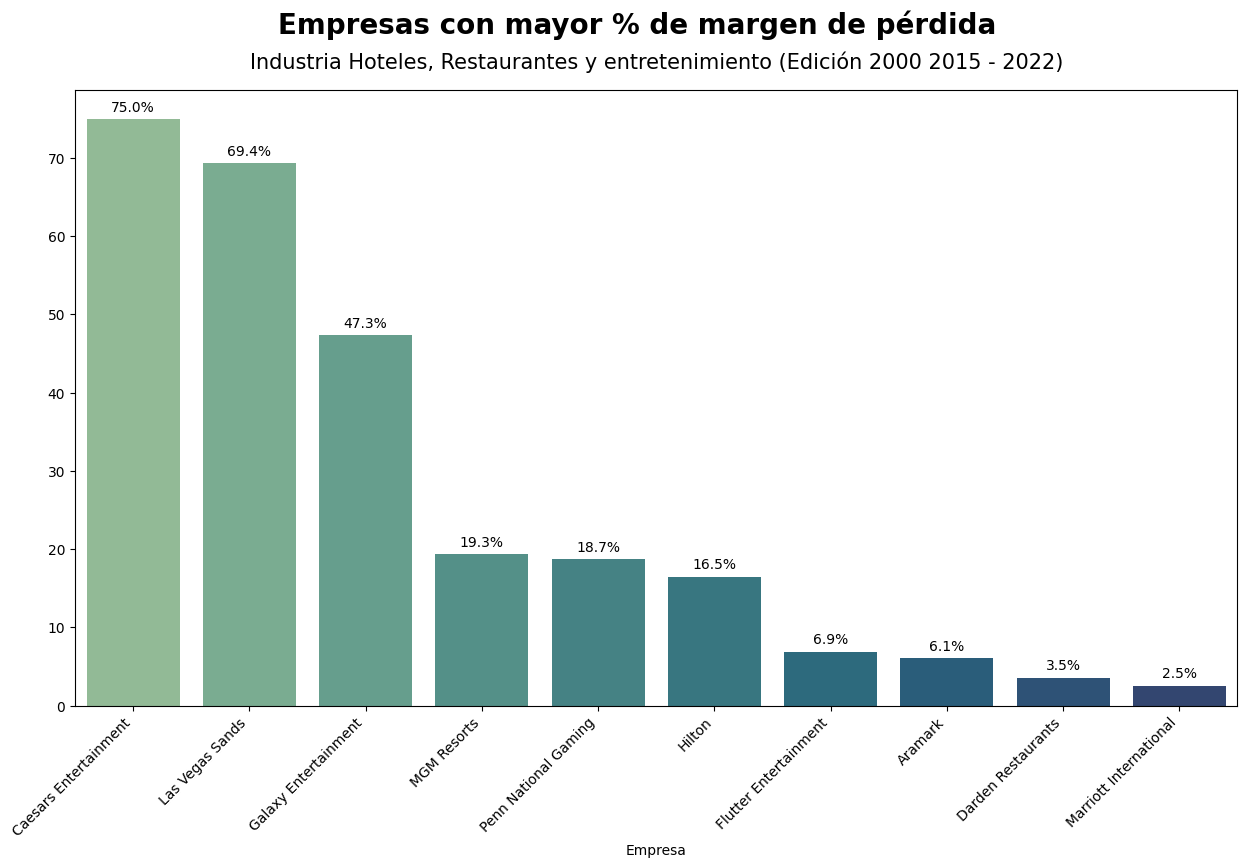

In [72]:
#Validamos que la empresa Carnival deberia ser reemplazado por Carnival Corporation
data_total['Empresa'] = data_total['Empresa'].replace('Carnival', 'Carnival Corporation')
# Filtramos la industria por Hoteles, Restaurantes y Entretenimiento y nos quedamos con ganancias <0
data_hotel=data_total[(data_total['Industria']=='Hotels, Restaurants & Leisure')&(data_total['Ganancias']<0)].sort_values('Ganancias')
# El margen de rentabilidad lo ponemos en absoluto
data_hotel['Margen_de_rentabilidad_abs']=(data_hotel['Margen_de_rentabilidad']*100).abs()
# Nos quedamos con las empresas que tienen un margen de rentabilidad <100 ya que tener margen de rentabilidad >100 es poco comun.
data_hotel=data_hotel[data_hotel['Margen_de_rentabilidad_abs']<100]
mayor_rentabilidad =data_hotel.groupby('Empresa')['Margen_de_rentabilidad_abs'].sum()
mayor_rentabilidad=mayor_rentabilidad.head(10)

plt.figure(figsize=(15, 8))
ax=sns.barplot(x=mayor_rentabilidad.index, y=mayor_rentabilidad.values,
                  palette='crest', saturation=0.75, width=0.8,order=mayor_rentabilidad.sort_values(ascending=False).index)

# Ajusta los nombres de empresa en diagonal
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Empresas con mayor % de margen de pérdida',fontsize=20,weight='bold')
plt.title('Industria Hoteles, Restaurantes y entretenimiento (Edición 2000 2015 - 2022)',fontsize=15,pad=15)

for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value +1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center')

plt.show()

4. Considerando a la Industria Petrolera en las Américas, ¿Cuál o cuáles empresas superaron en más del 20% la rentabilidad de sus activos?

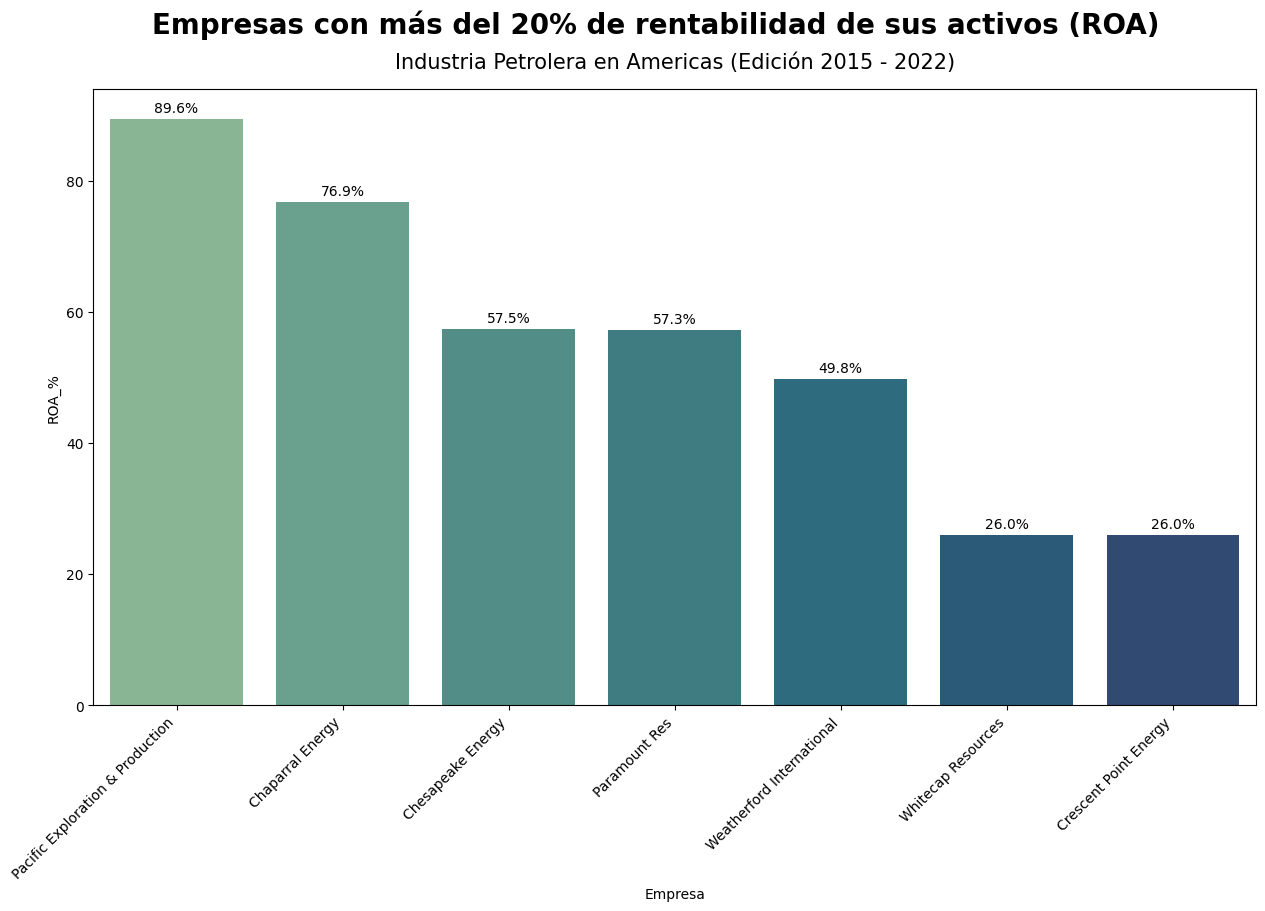

In [73]:
# Filtramos la industria Petrolera y nos quedamos con ROA <1
top_oil = data_total[(data_total['Industria'] == 'Oil & Gas Operations')&(data_total['ROA']<1)
&((data_total['Continente']=='North America')|(data_total['Continente']=='South America'))].sort_values(by='ROA',ascending=False)
top_oil=top_oil.query('ROA>0.2')
top_oil['ROA_%']=top_oil['ROA']*100

plt.figure(figsize=(15, 8))
ax=sns.barplot(x=top_oil['Empresa'], y=top_oil['ROA_%'],
                  palette='crest', saturation=0.75, width=0.8)

# Ajusta los nombres de empresa en diagonal
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Empresas con más del 20% de rentabilidad de sus activos (ROA)',fontsize=20,weight='bold')
plt.title('Industria Petrolera en Americas (Edición 2015 - 2022)',fontsize=15,pad=15)

for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value +1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center')

plt.show()

5. ¿Cuáles fueron las empresas europeas con el mayor porcentaje de rentabilidad por industria?

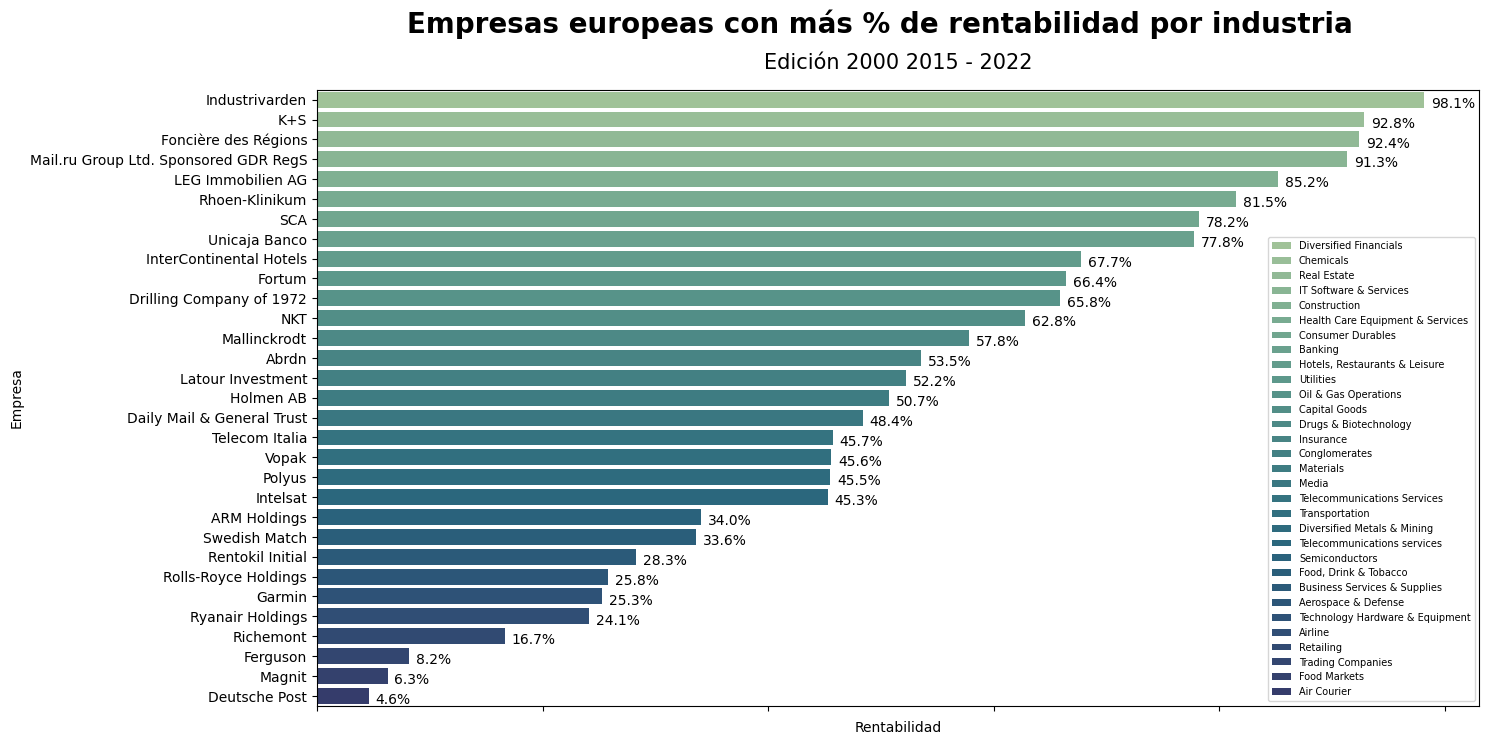

In [74]:
# Filtramos la empresas europeas y nos quedamos con margen de rentabilidad <1
top_europe = data_total[(data_total['Continente']=='Europe')&(data_total['Margen_de_rentabilidad']<1)]
mayor_rentabilidad =top_europe.groupby('Industria')['Margen_de_rentabilidad'].idxmax()
empresas_rentabilidad = top_europe.loc[mayor_rentabilidad, ['Industria','Continente', 'Empresa', 'Margen_de_rentabilidad']]
empresas_rentabilidad['%_rentabilidad']=(empresas_rentabilidad['Margen_de_rentabilidad']*100)

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
data_sorted = empresas_rentabilidad.sort_values('%_rentabilidad',ascending=False)
ax=sns.barplot(data=data_sorted, x='%_rentabilidad', y='Empresa', hue='Industria', dodge=False,palette='crest')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Empresas europeas con más % de rentabilidad por industria',fontsize=20,weight='bold')
plt.title('Edición 2000 2015 - 2022',fontsize=15,pad=15)
plt.xlabel('Rentabilidad')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()

6. ¿Cuáles fueron las 10 empresas norteamericanas con  mayores pérdidas registradas por industria a nivel global?

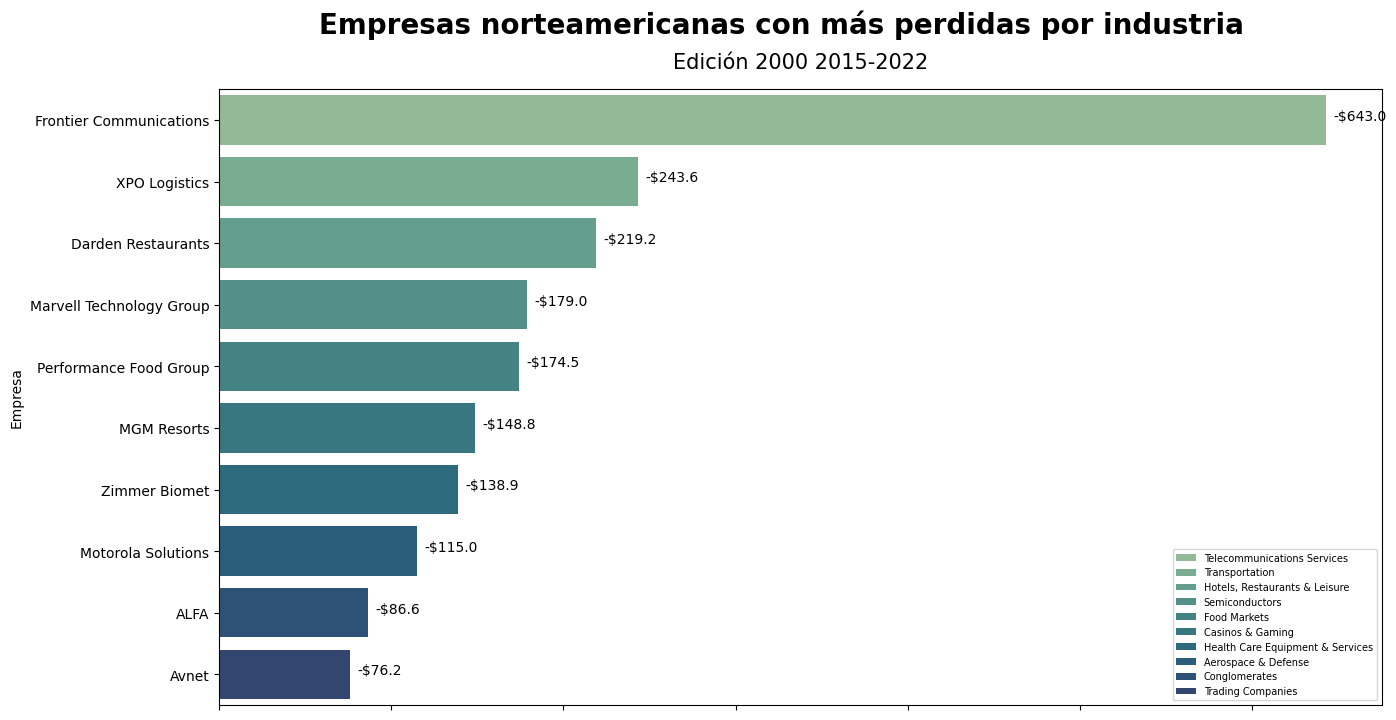

In [75]:
# Filtramos la continente norteamericanos y nos quedamos con ganancia < 0
data_america=data_forbes_total[(data_forbes_total['Continente']=='North America')&(data_forbes_total['Ganancias']<0)]

mayor_perdida =data_america.groupby('Industria')['Ganancias'].idxmax()
empresas_perdida = data_america.loc[mayor_perdida, ['Industria', 'Empresa', 'Ganancias']].sort_values('Ganancias').head(10)
empresas_perdida['Ganancias_abs']=empresas_perdida['Ganancias'].abs()

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=empresas_perdida, x='Ganancias_abs', y='Empresa', hue='Industria', dodge=False,palette='crest')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Empresas norteamericanas con más perdidas por industria',fontsize=20,weight='bold')
plt.title('Edición 2000 2015-2022',fontsize=15,pad=15)
plt.xlabel('')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()/2
    ax.annotate(f'-${value:.1f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()


7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones de dólares?

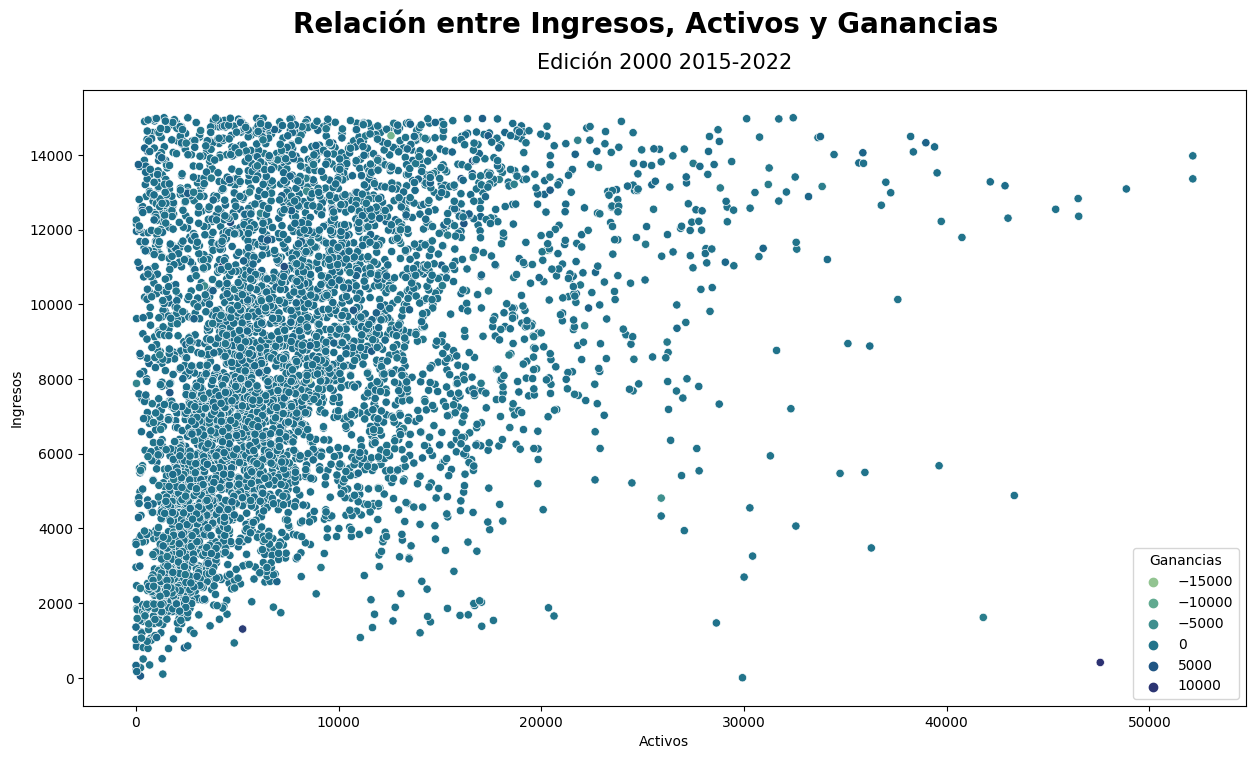

In [76]:
plt.figure(figsize=(15, 8))
# Filtrar los datos
data_filtrada = data_total[data_total['Activos'] <= 15000]
distribucion_ingreso = data_filtrada['Ingresos'].describe()
distribucion_activo = data_filtrada['Activos'].describe()
sns.scatterplot(data=data_filtrada, x='Ingresos', y='Activos', hue='Ganancias',palette='crest')

# Personalizar el gráfico
plt.suptitle('Relación entre Ingresos, Activos y Ganancias',fontsize=20,weight='bold')
plt.title('Edición 2000 2015-2022',fontsize=15,pad=15)
plt.xlabel('Activos')
plt.ylabel('Ingresos')

plt.show()


8. ¿Cuáles fueron las ganancias anuales de las principales empresas en la Industria automotriz?

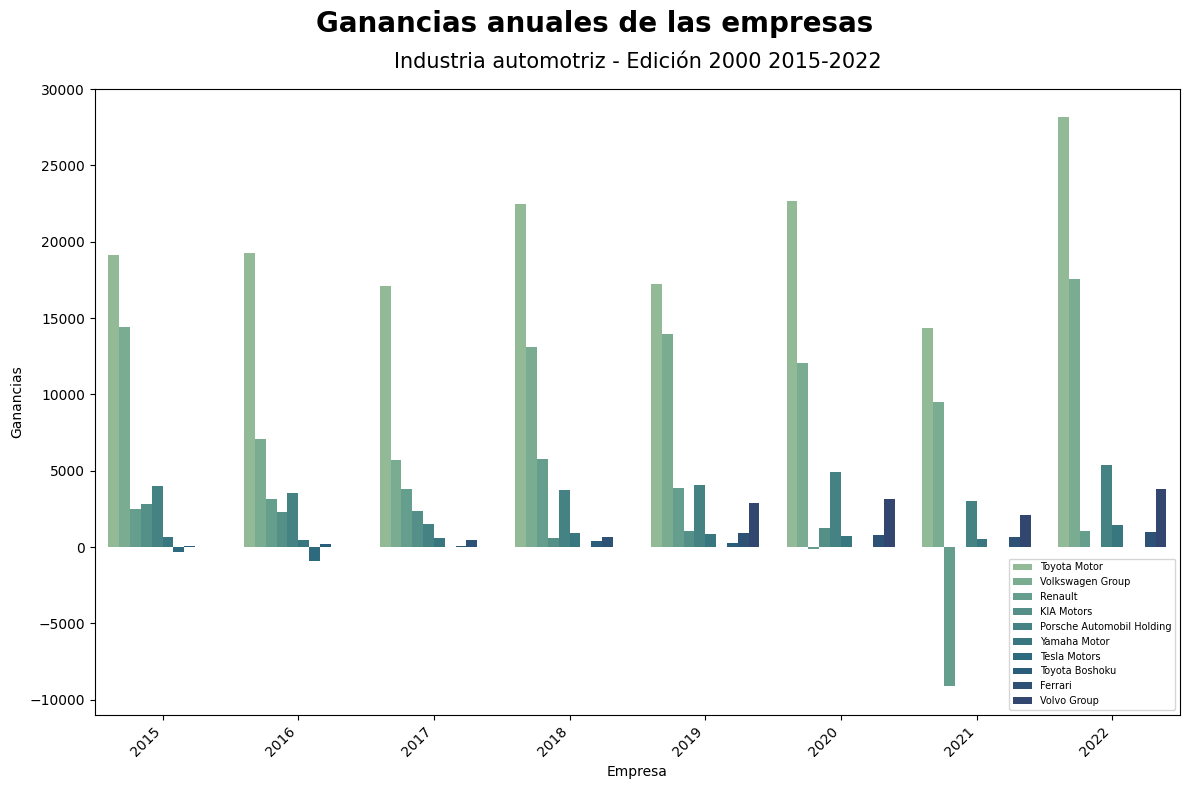

In [78]:
empresas = ['Toyota Motor', 'Volkswagen Group', 'Toyota Boshoku', 'Tesla Motors', 'Yamaha Motor', 'Volvo Group',
                         'Ferrari','Renault', 'Porsche Automobil Holding', 'KIA Motors']

data_ganancias=data_total[(data_total['Industria']=='Consumer Durables')&(data_total['Empresa'].isin(empresas))]
plt.figure(figsize=(12, 8))

ax=sns.barplot(data=data_ganancias, x='Año', y='Ganancias', hue='Empresa',palette='crest')

# Ajusta los nombres de empresa en diagonal
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.suptitle('Ganancias anuales de las empresas',fontsize=20,weight='bold')
plt.title('Industria automotriz - Edición 2000 2015-2022',fontsize=15,pad=15)
plt.xlabel('Empresa')
plt.ylabel('Ganancias')

plt.legend(loc='lower right',fontsize=7)
plt.tight_layout()

plt.show()




## **Graficos Extra**

1. Crea un gráfico de carrera de barras (racing bar chart) que indique la variación del valor de mercado por industria durante el periodo 2015 - 2022. Utiliza el repositorio GitHub - dexplo/bar_chart_race: Create animated bar chart races in Python with matplotlib para que utilices esta sencilla herramienta.


In [101]:
# Creamos la tabla pivot de doble entrada
variation_df = data_total.pivot_table(values='Valor de Mercado', index='Año', columns='Industria')
variation_df.fillna(0, inplace=True)

variation_df = variation_df.reset_index()
variation_df = variation_df.rename(columns={'Año': 'Año'})
variation_df = variation_df.set_index('Año')


In [107]:
variation_df['IT Software & Services']

Año
2015     58776.050000
2016     54357.400000
2017     67227.500000
2018     85820.711538
2019     79447.895238
2020     83675.185714
2021    120069.325301
2022    109009.904110
Name: IT Software & Services, dtype: float64

In [131]:
# Crear el gráfico de carrera de barras animado

bcr.bar_chart_race(variation_df,
                   title='Variación del Valor del mercado de cada industria\n Edición 2015-2022',
                   cmap='tab20C',period_length=1000,fixed_order=True,period_fmt='Año {x:.0f}',
                   label_bars=True,
                   tick_label_size=8, bar_label_size=8,
                   figsize=(12, 6), steps_per_period=80,fixed_max=True)


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



2. Crea otro gráfico de carrera de barras que muestre la variación del número de empleados por industria durante el periodo 2015 - 2022.

In [132]:
variation_empleados = data_total.pivot_table(values='Empleados', index='Año', columns='Industria',aggfunc='sum')
variation_empleados.fillna(0, inplace=True)

variation_empleados = variation_empleados.reset_index()
variation_empleados = variation_empleados.rename(columns={'Año': 'Año'})
variation_empleados = variation_empleados.set_index('Año')

In [133]:
# Crear el gráfico de carrera de barras animado

bcr.bar_chart_race(variation_empleados,
                   title='Variación del Valor del mercado de cada industria\n Edición 2015-2022',
                   cmap='tab20C',period_length=1000,fixed_order=True,period_fmt='Año {x:.0f}',
                   label_bars=True,
                   tick_label_size=8, bar_label_size=8,
                   figsize=(12, 6), steps_per_period=80,fixed_max=True)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



3. Utilizando la biblioteca   de Plotly, genera un mapa con el total de ventas globales por país en el año 2020

In [126]:
import plotly.graph_objects as go

data_año = data_total[data_total['Año'] == 2020]
data_agrupada = df.groupby(['Pais', 'Codigo'])['Ingresos'].sum().reset_index()

min_value = data_año['Ingresos'].min()
max_value = data_año['Ingresos'].max()

fig = go.Figure(data=go.Choropleth(
    locations=data_agrupada['Codigo'],
    z=data_agrupada['Ingresos'],
    text=data_agrupada['Pais'],
    colorscale='plotly3',
    autocolorscale=True,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=2,
    colorbar_tickprefix='$',
    colorbar_title='US$',
    zmin=min_value,
    zmax=max_value,
))

fig.update_geos(
    resolution=50,
    showcountries=True,
    showcoastlines=True,
    coastlinecolor='darkgray',
    projection_type='equirectangular',
    lonaxis_range=[-180, 180],
    lataxis_range=[-90, 90],
    fitbounds='locations'
)

fig.update_layout(
    title_text='Ventas globales por país en el año 2020',
    width=1650,  # Ancho del gráfico
    height=850,  # Alto del gráfico
    annotations=[dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Fuente: Fortune Global 2000',
        showarrow=False
    )]
)

fig.show()